This scirpt for draw plot results xy model and z model combined.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob
import scipy
import seaborn

In [2]:
#### load prediction and batch files
##
uni_xy = "20221226_xy_test"
uni_z = "20221226_z_test"

geo = 1 ## 1 jsns2 / 2 cylinder / 3 sphere

path_xy = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni_xy +"*/*"+uni_xy +".csv"
pred_path_xy = glob.glob(path_xy)
pred_list_xy = [file for file in pred_path_xy if file.endswith(".csv")]


path_b_xy= "/users/yewzzang/work/JSNS2_vertex/result/*"+uni_xy +"*/*"+uni_xy +"_batch.csv"
pred_path_b_xy = glob.glob(path_b_xy)
pred_list_b_xy = [file for file in pred_path_b_xy if file.endswith(".csv")]


path_z = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni_z +"*/*"+uni_z +".csv"
pred_path_z = glob.glob(path_z)
pred_list_z = [file for file in pred_path_z if file.endswith(".csv")]


path_b_z= "/users/yewzzang/work/JSNS2_vertex/result/*"+uni_z +"*/*"+uni_z +"_batch.csv"
pred_path_b_z = glob.glob(path_b_z)
pred_list_b_z = [file for file in pred_path_b_z if file.endswith(".csv")]




In [3]:
### load pred, jade, label vtx

pred_xy_list = pd.read_csv(pred_list_xy[0])
pred_z_list = pd.read_csv(pred_list_z[0])

### load file enery
batch_xy_list = pd.read_csv(pred_list_b_xy[0])
batch_z_list = pd.read_csv(pred_list_b_z[0])


In [4]:
### data to numpy array pred, jade, label vtx & energy 
pred_xy = np.array(pred_xy_list['prediction']).reshape(-1,2)
pred_z = np.array(pred_z_list['prediction']).reshape(-1,1)
pred = np.concatenate([pred_xy, pred_z],axis=1)

jade_xy = np.array(pred_xy_list['jade']).reshape(-1,2)
jade_z = np.array(pred_z_list['jade']).reshape(-1,1)
jade = np.concatenate([jade_xy, jade_z],axis=1)

label_xy = np.array(pred_xy_list['label']).reshape(-1,2)
label_z = np.array(pred_z_list['label']).reshape(-1,1)
label = np.concatenate([label_xy, label_z],axis=1)

energy = np.array(batch_xy_list['energy'])



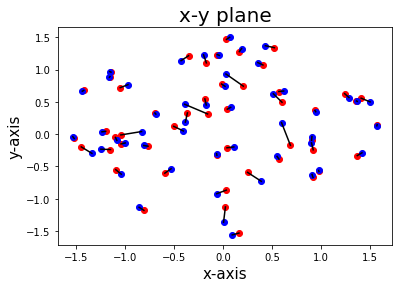

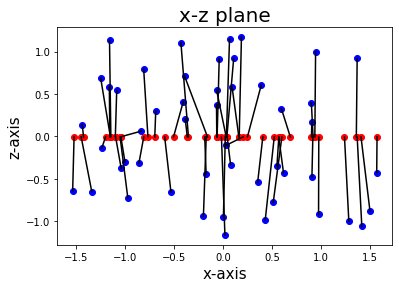

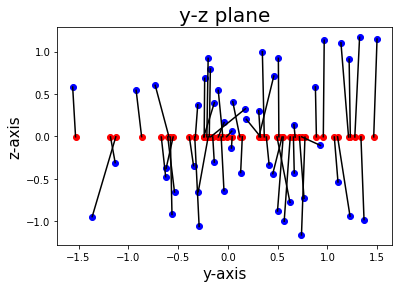

In [5]:
plt.scatter(pred[:50,0],pred[:50,1],color='r')
plt.scatter(label[:50,0],label[:50,1],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,1],label[i,1]],'k-')
plt.title('x-y plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('y-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,0],pred[:50,2],color='r')
plt.scatter(label[:50,0],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,2],label[i,2]],'k-')
plt.title('x-z plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,1],pred[:50,2],color='r')
plt.scatter(label[:50,1],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,1],label[i,1]],[pred[i,2],label[i,2]],'k-')
plt.title('y-z plane',fontsize=20)
plt.xlabel('y-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()




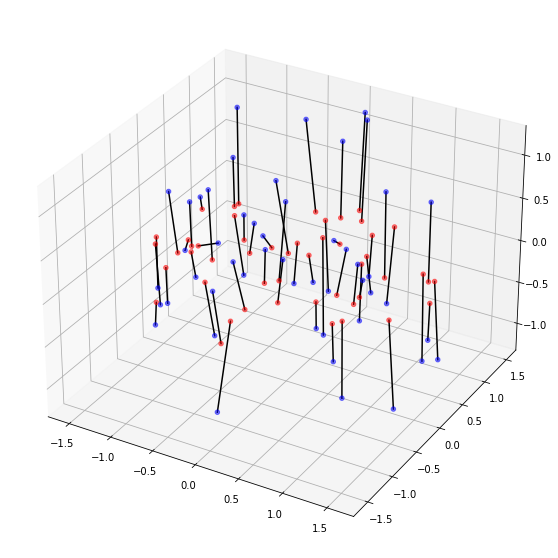

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pred[:50,0], pred[:50,1], pred[:50,2], color = 'r', alpha = 0.5)
ax.scatter(label[:50,0], label[:50,1], label[:50,2], color = 'b', alpha = 0.5)
# ax.plot3D([0,1],[0,1],[0,1])
# ax.plot3D([pred[:1,0][0],label[:1,0][0]],[pred[:1,1][0],label[:1,1][0]],[pred[:1,2][0],label[:1,2][0]])
for i in range(50):
    ax.plot3D([pred[i,0],label[i,0]],
            [pred[i,1],label[i,1]],
            [pred[i,2],label[i,2]],'black')


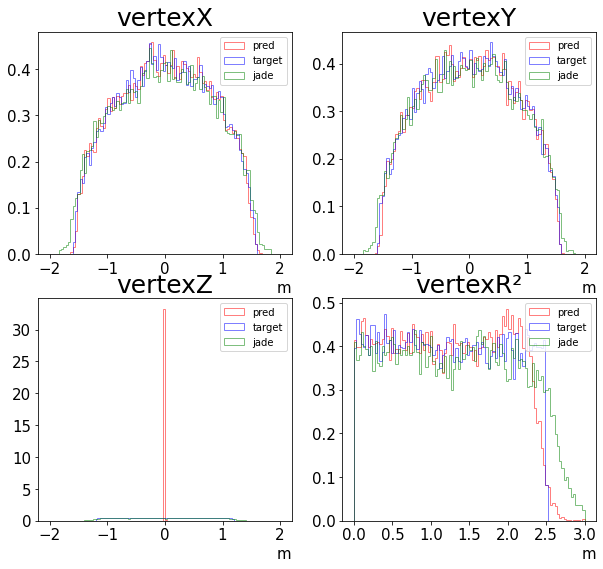

In [7]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.subplot(2,2,1)
######### jsns2 geo
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

# plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexX',fontsize = 25)
# plt.xlim([-0.0005,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)

plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

plt.title('vertexY',fontsize = 25)
# plt.xlim([-0.00016,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

plt.title('vertexR\u00b2',fontsize = 25)
# plt.xlim([-1,6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


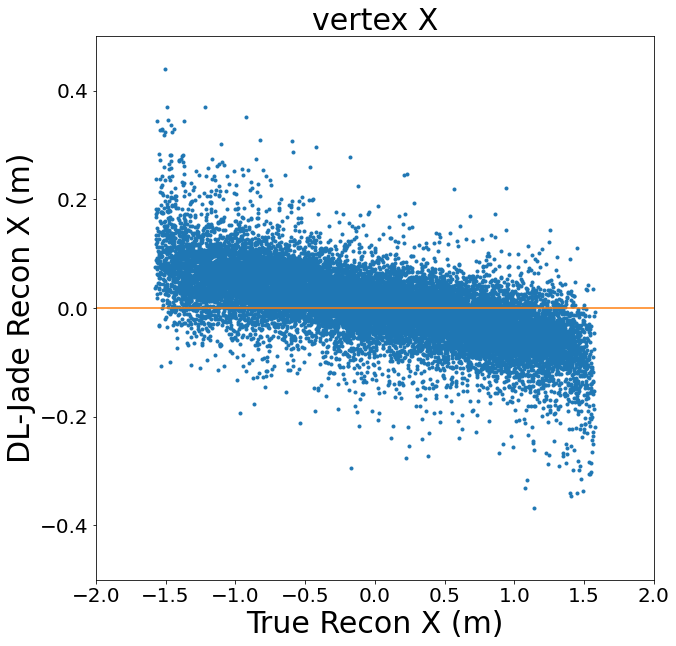

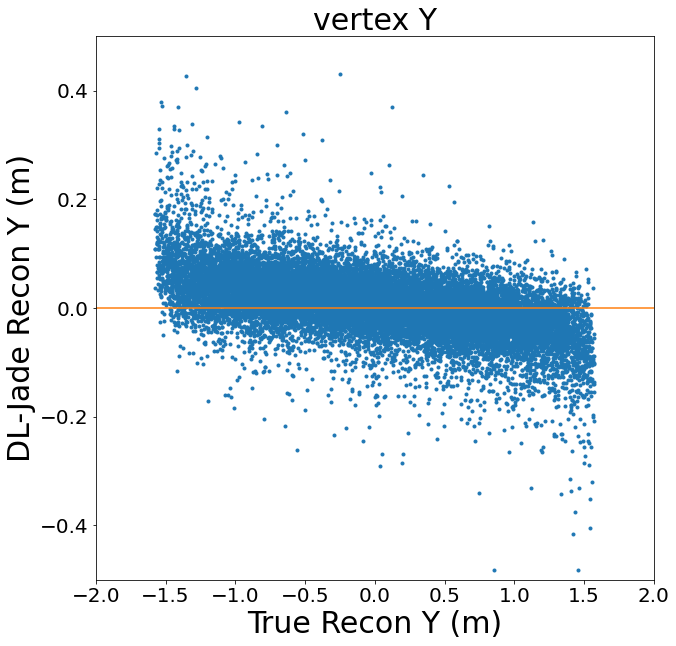

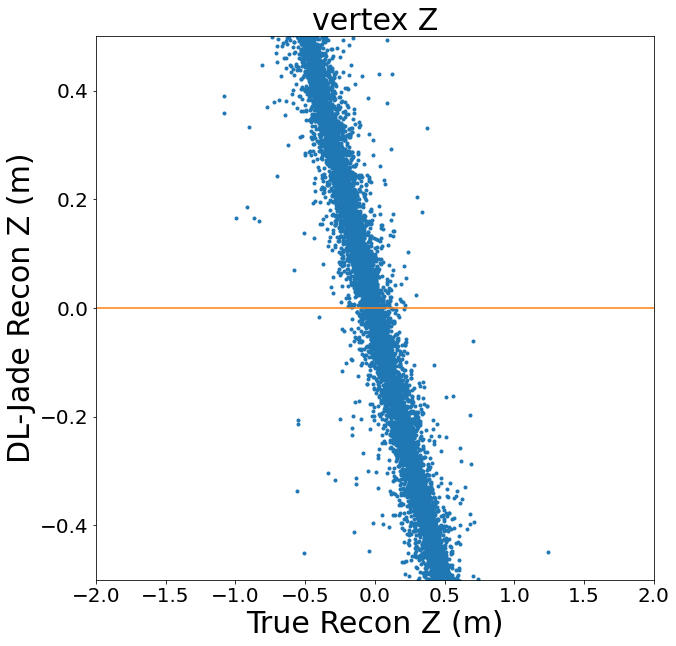

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(label[:,0],pred[:,0]-jade[:,0],'.')
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
plt.xlabel('True Recon X (m)',fontsize = 30)
plt.ylabel('DL-Jade Recon X (m)',fontsize = 30)
plt.title('vertex X',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()



plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(label[:,1],pred[:,1]-jade[:,1],'.')
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
plt.xlabel('True Recon Y (m)',fontsize = 30)
plt.ylabel('DL-Jade Recon Y (m)',fontsize = 30)
plt.title('vertex Y',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(label[:,2],pred[:,2]-jade[:,2],'.')
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlabel('True Recon Z (m)',fontsize = 30)
plt.ylabel('DL-Jade Recon Z (m)',fontsize = 30)
plt.title('vertex Z',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


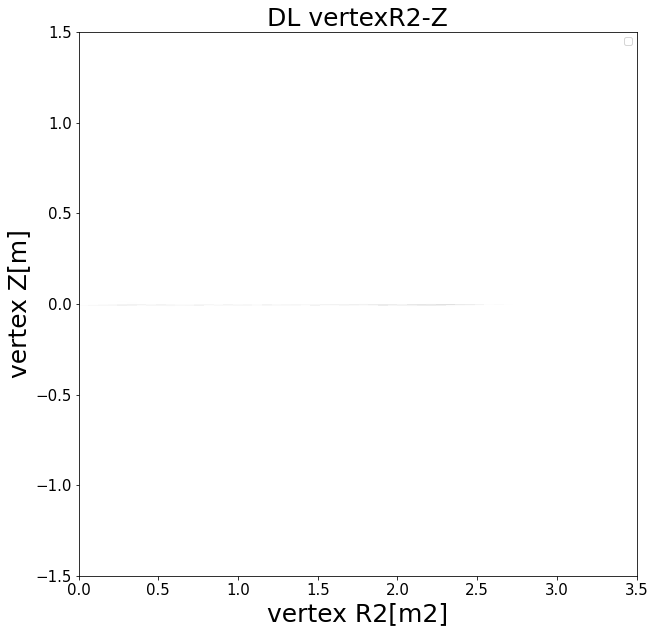

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


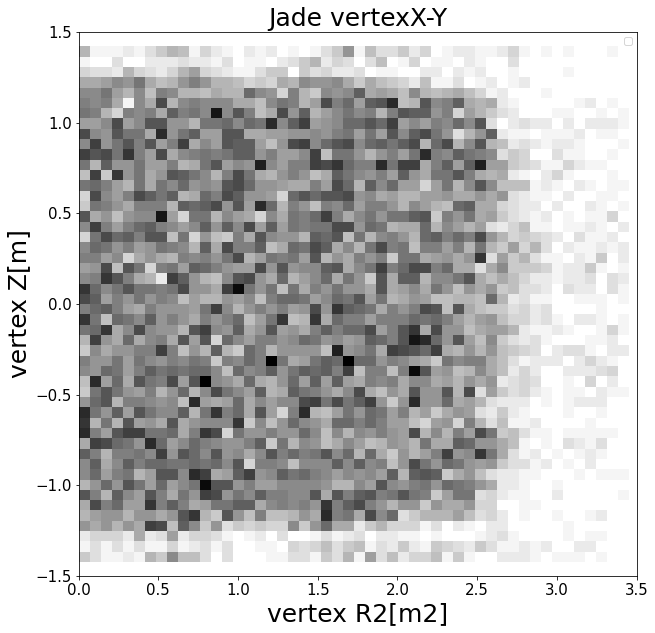

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


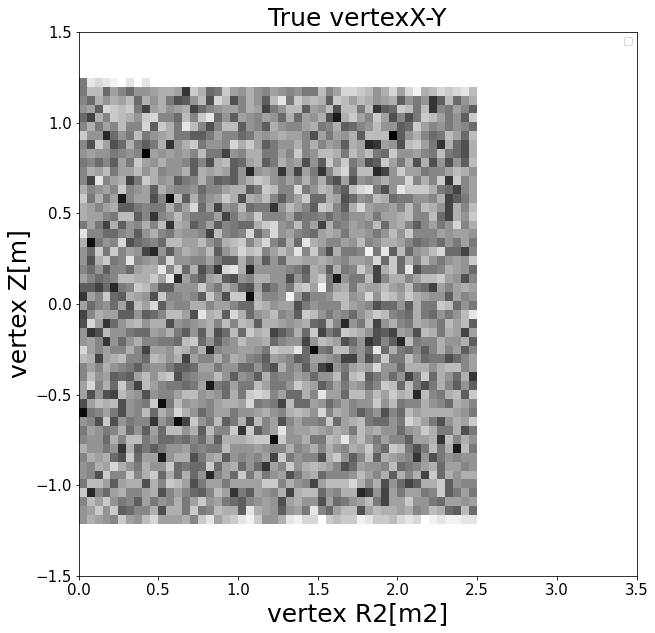

In [9]:
orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()

plt.hist2d((pred[:,0]**2+pred[:,1]** 2),pred[:,2], bins = 50,cmap=r_map)
plt.title('DL vertexR2-Z',fontsize = 25)
plt.xlim([0,3.5])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("vertex R2[m2]", fontsize=25)
plt.ylabel("vertex Z[m]", fontsize=25)
plt.legend()
plt.show()


plt.hist2d((jade[:,0]**2+jade[:,1]** 2),jade[:,2], bins = 50,cmap=r_map)
plt.title('Jade vertexX-Y',fontsize = 25)
plt.xlim([0,3.5])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("vertex R2[m2]", fontsize=25)
plt.ylabel("vertex Z[m]", fontsize=25)
plt.legend()
plt.show()

plt.hist2d((label[:,0]**2+label[:,1]** 2),label[:,2], bins = 50,cmap=r_map)
plt.title('True vertexX-Y',fontsize = 25)
plt.xlim([0,3.5])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("vertex R2[m2]", fontsize=25)
plt.ylabel("vertex Z[m]", fontsize=25)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


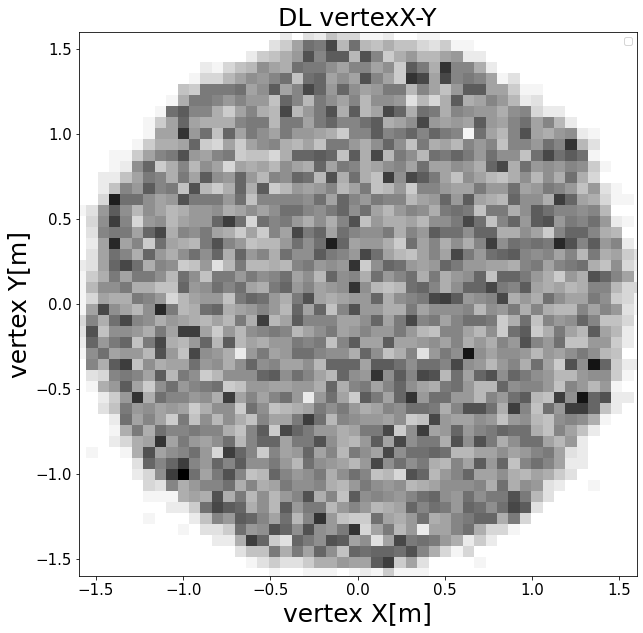

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


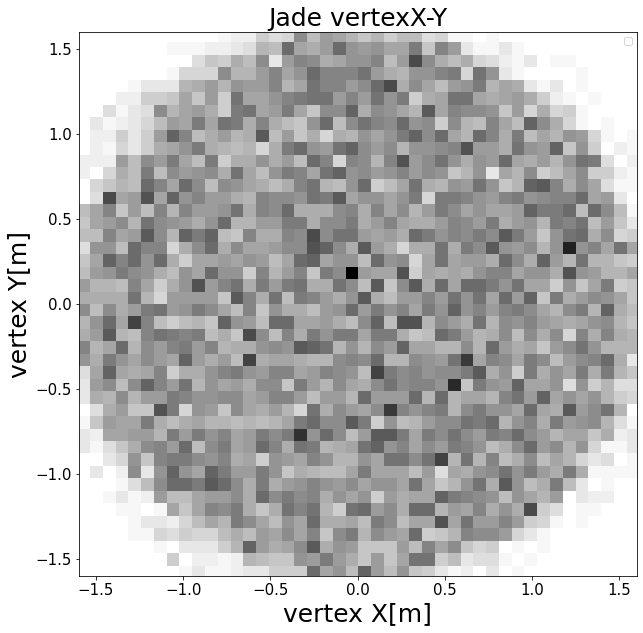

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


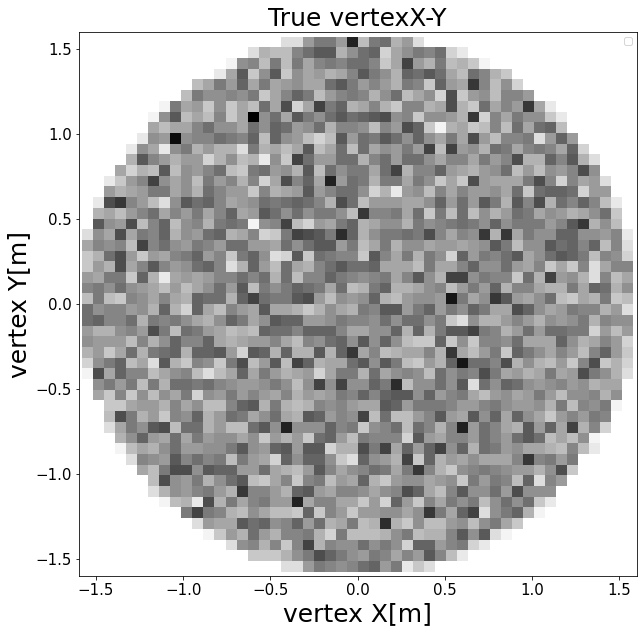

In [10]:
orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()

plt.hist2d(pred[:,0],pred[:,1], bins = 50,cmap=r_map)
plt.title('DL vertexX-Y',fontsize = 25)
plt.xlim([-1.6,1.6])
plt.ylim([-1.6,1.6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("vertex X[m]", fontsize=25)
plt.ylabel("vertex Y[m]", fontsize=25)
plt.legend()
plt.show()


plt.hist2d(jade[:,0],jade[:,1], bins = 50,cmap=r_map)
plt.title('Jade vertexX-Y',fontsize = 25)
plt.xlim([-1.6,1.6])
plt.ylim([-1.6,1.6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("vertex X[m]", fontsize=25)
plt.ylabel("vertex Y[m]", fontsize=25)
plt.legend()
plt.show()

plt.hist2d(label[:,0],label[:,1], bins = 50,cmap=r_map)
plt.title('True vertexX-Y',fontsize = 25)
plt.xlim([-1.6,1.6])
plt.ylim([-1.6,1.6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("vertex X[m]", fontsize=25)
plt.ylabel("vertex Y[m]", fontsize=25)
plt.legend()
plt.show()

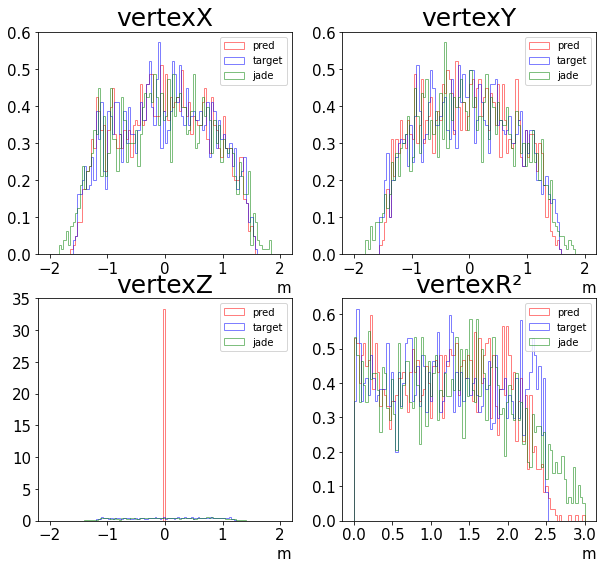

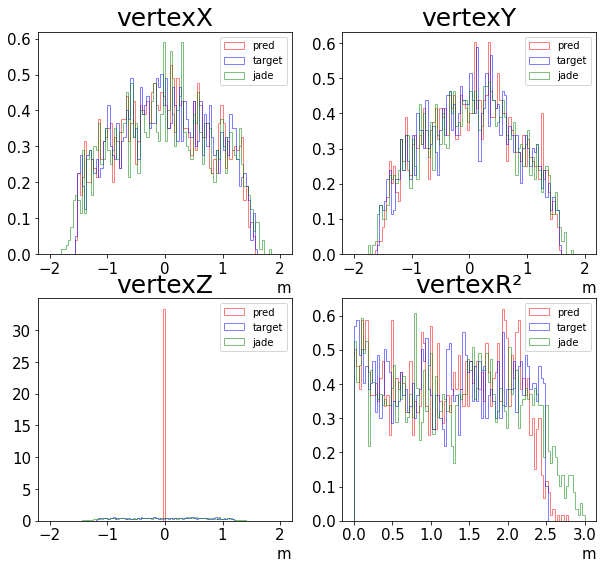

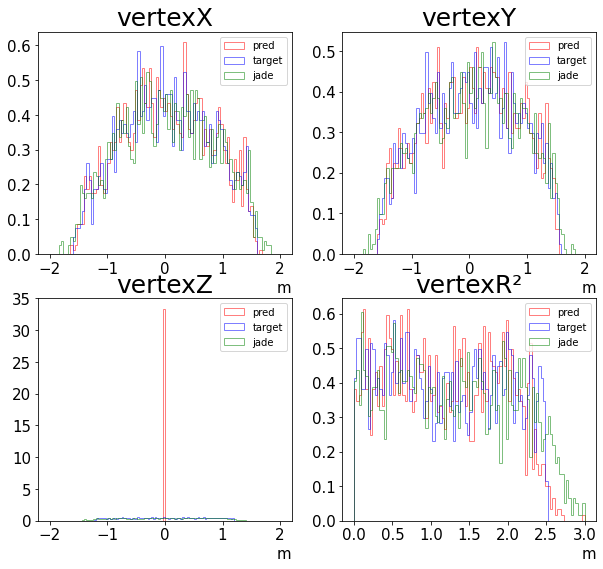

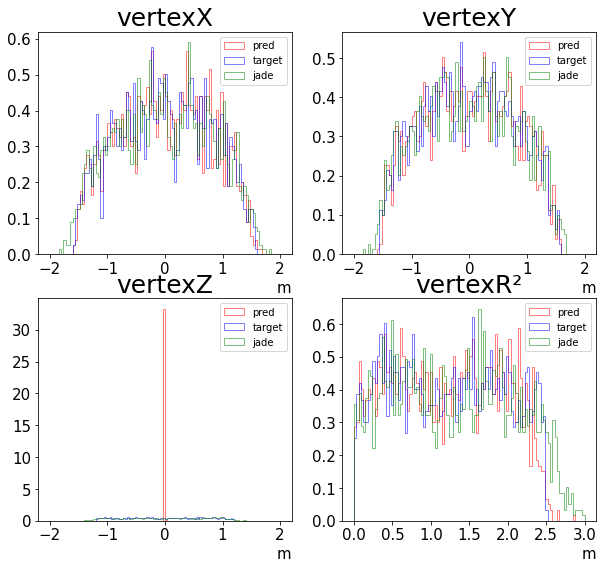

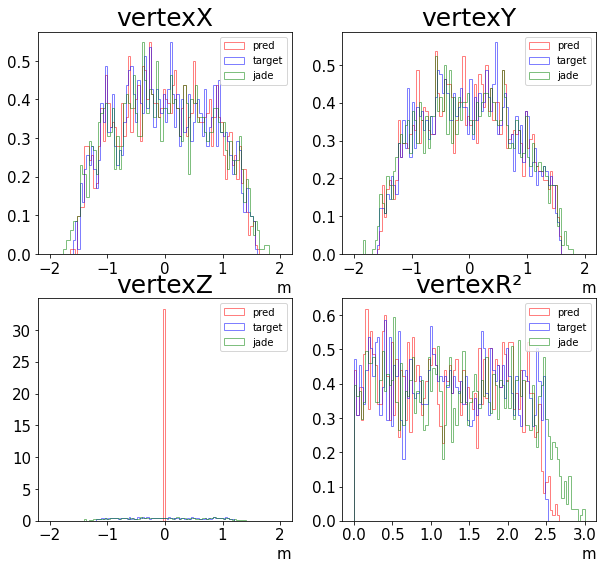

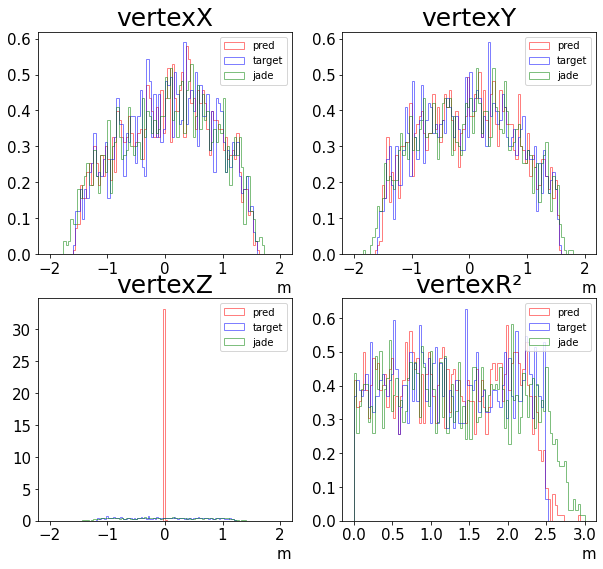

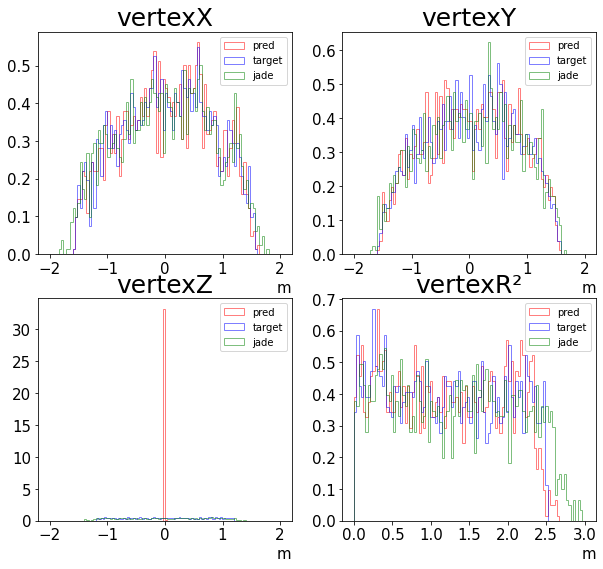

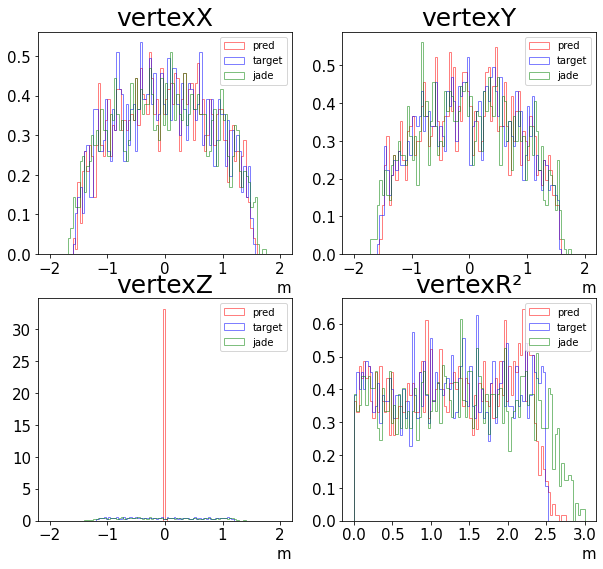

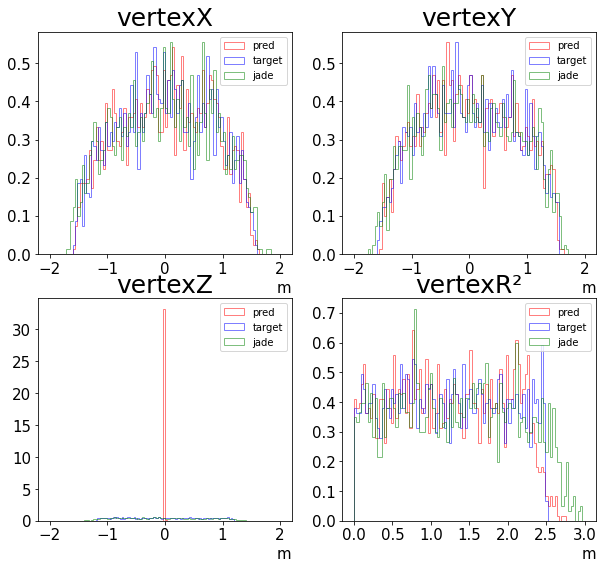

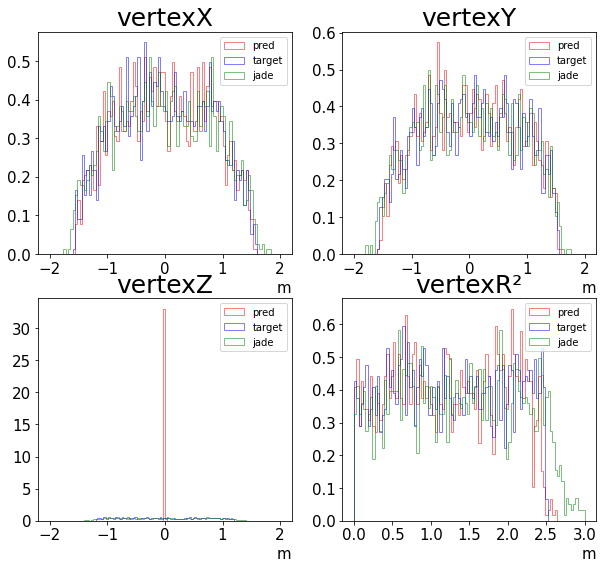

In [11]:
energy_list = [1,2,3,4,5,6,7,8,9,10]
for a in energy_list:
    plt.rcParams['figure.figsize'] = (10, 9)
    plt.subplot(2,2,1)
    ######### jsns2 geo
    plt.hist(pred[:,0][energy == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,0][energy == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

    plt.hist(jade[:,0][energy == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    # plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexX',fontsize = 25)
    # plt.xlim([-0.0005,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,2)

    plt.hist(pred[:,1][energy == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,1][energy == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,1][energy == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexY',fontsize = 25)
    # plt.xlim([-0.00016,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()

    plt.subplot(2,2,3)
    plt.hist(pred[:,2][energy == a], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,2][energy == a], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,2][energy == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexZ',fontsize = 25)
    # plt.xlim([-3,3])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,4)
    plt.hist((pred[:,0][energy == a]**2+pred[:,1][energy == a]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist((label[:,0][energy == a]**2+label[:,1][energy == a]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist((jade[:,0][energy == a]**2+jade[:,1][energy == a]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexR\u00b2',fontsize = 25)
    # plt.xlim([-1,6])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()
    plt.show()


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


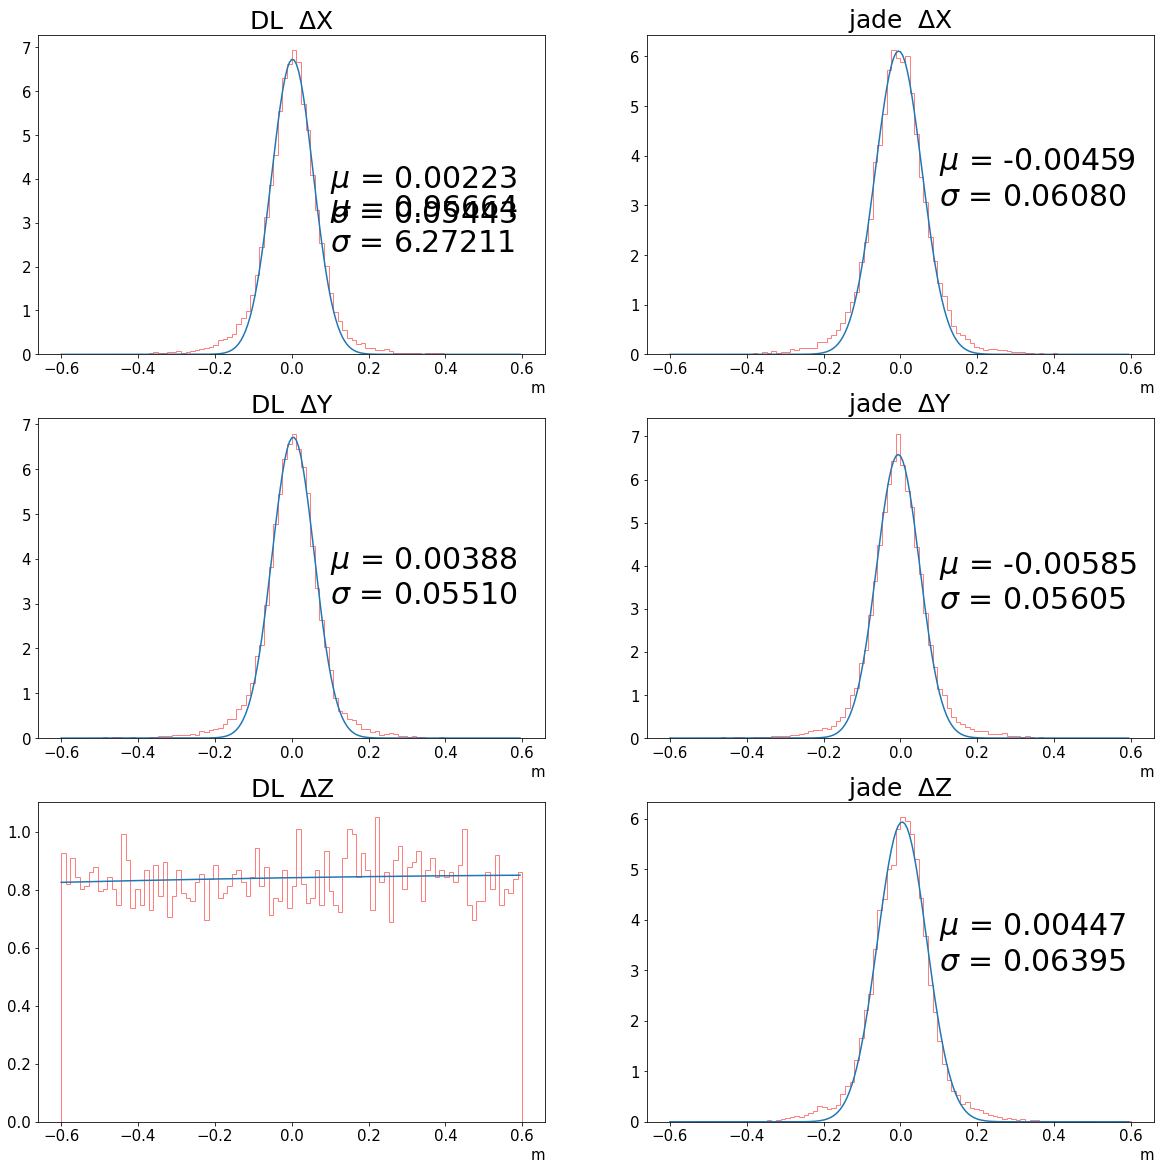

In [12]:
from scipy.optimize import curve_fit

ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(3,2,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,3)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,5)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


plt.subplot(3,2,2)
tmp_hist = plt.hist(jade[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,4)

tmp_hist = plt.hist(jade[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,6)
tmp_hist = plt.hist(jade[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran, ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.show()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 1


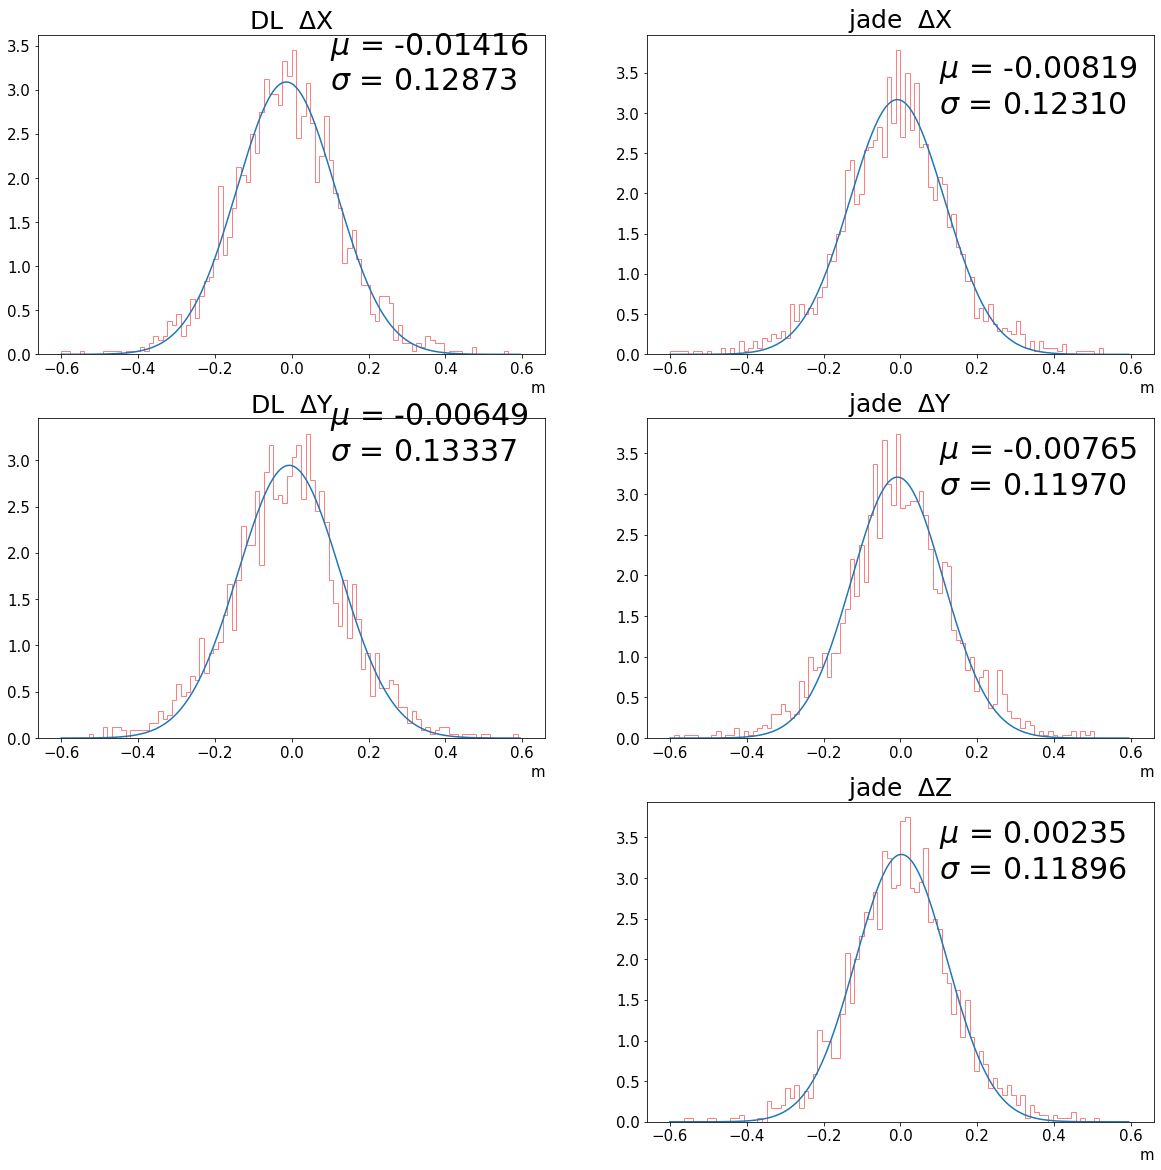

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 2


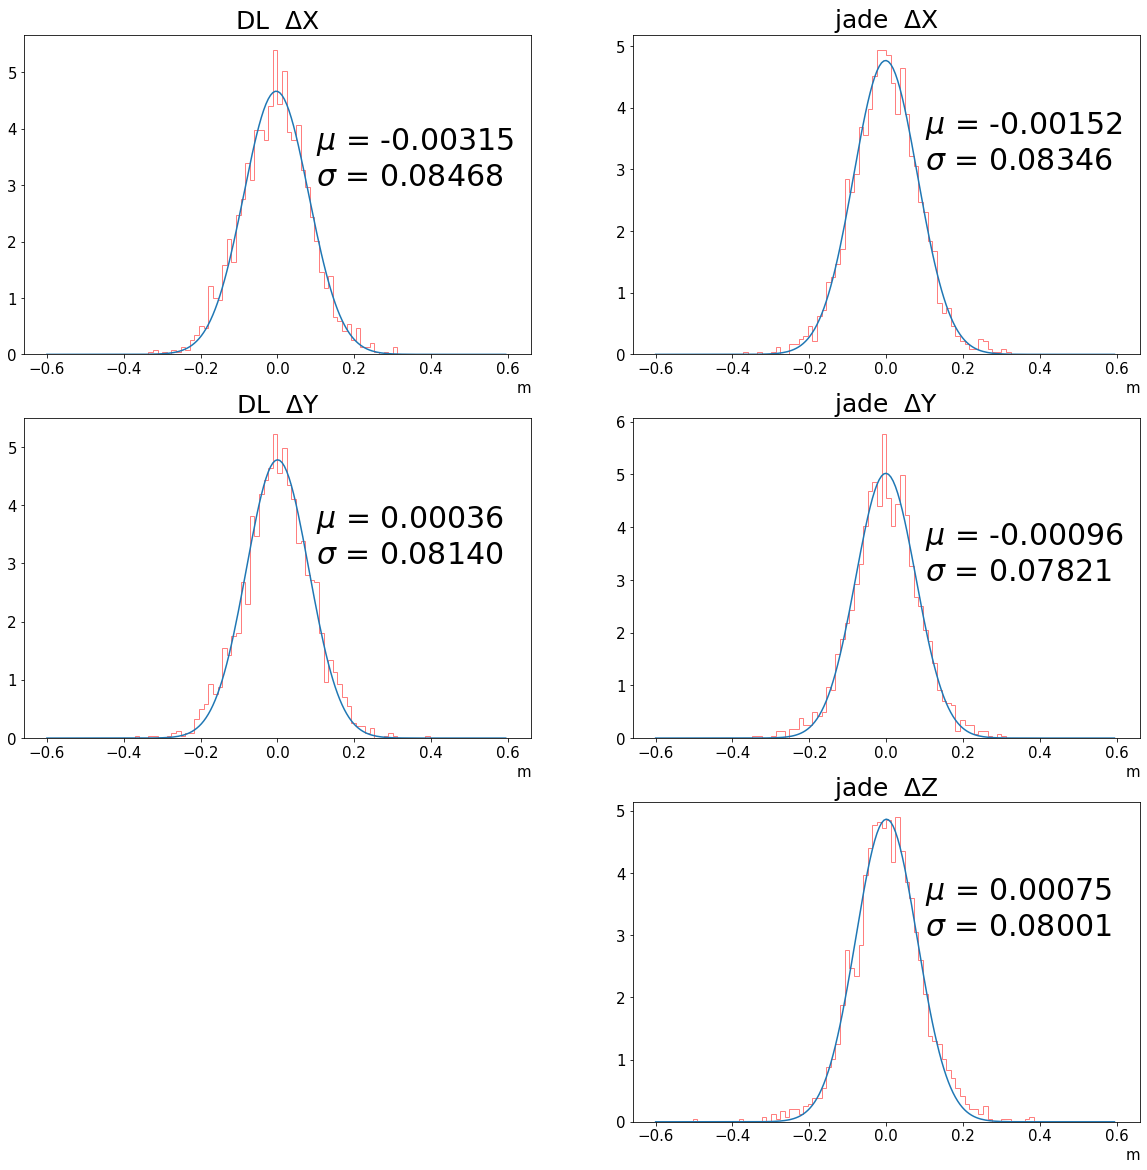

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 3


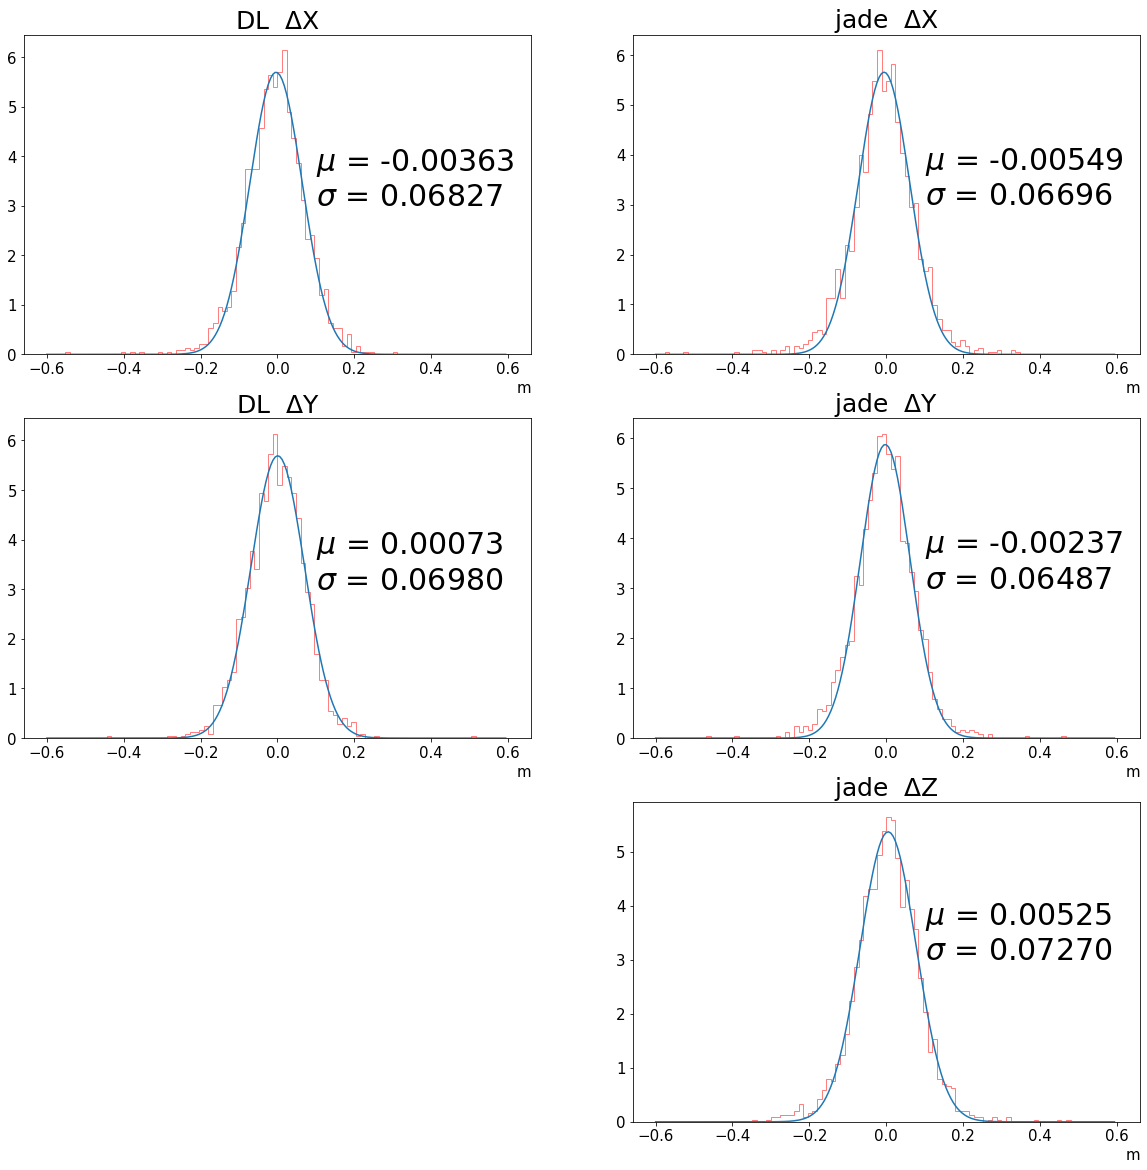

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 4


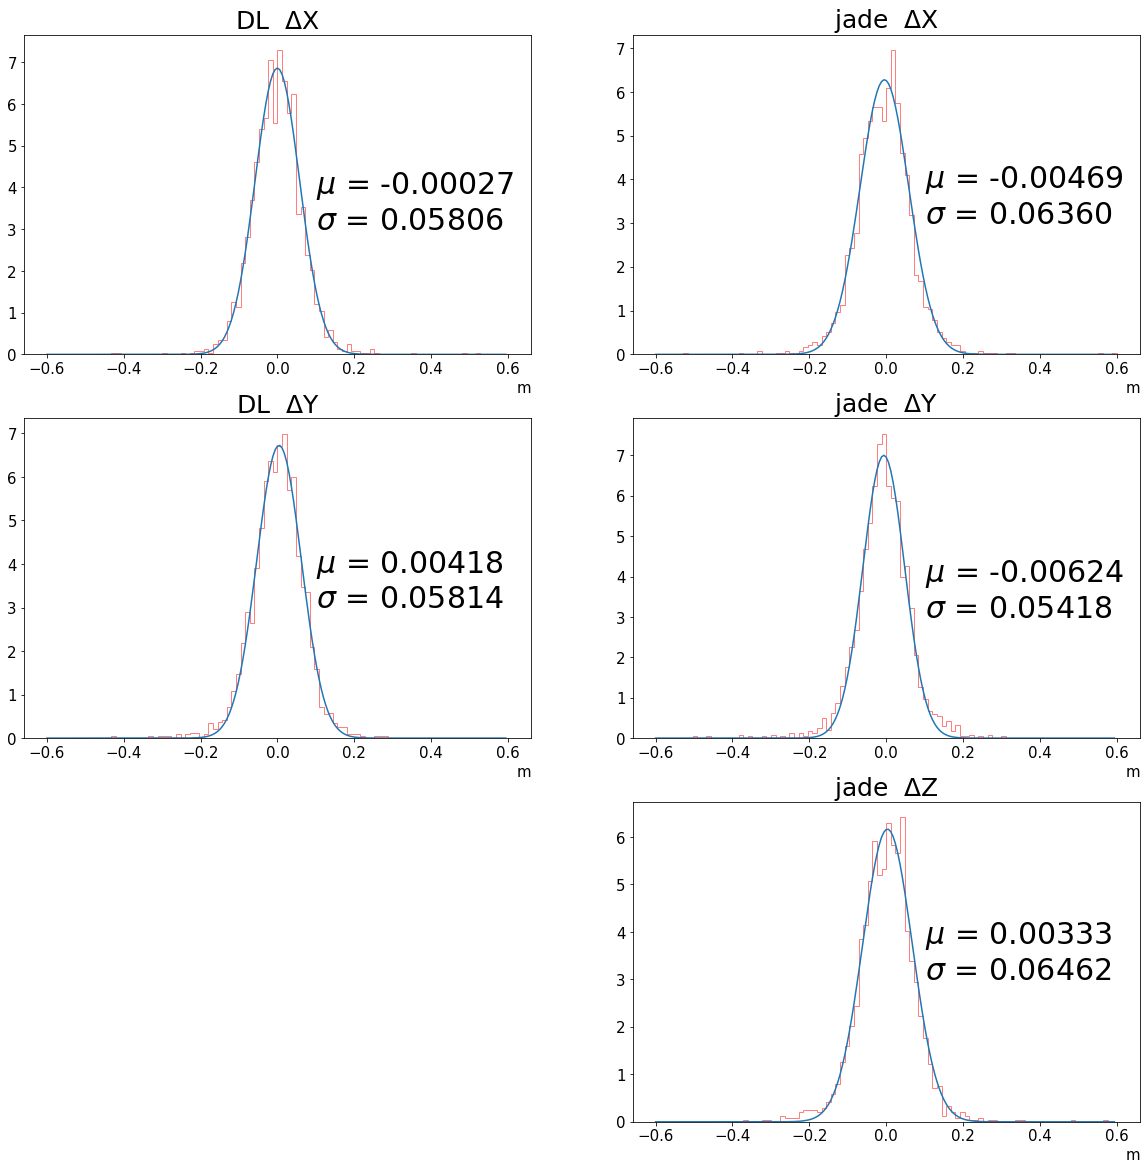

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 5


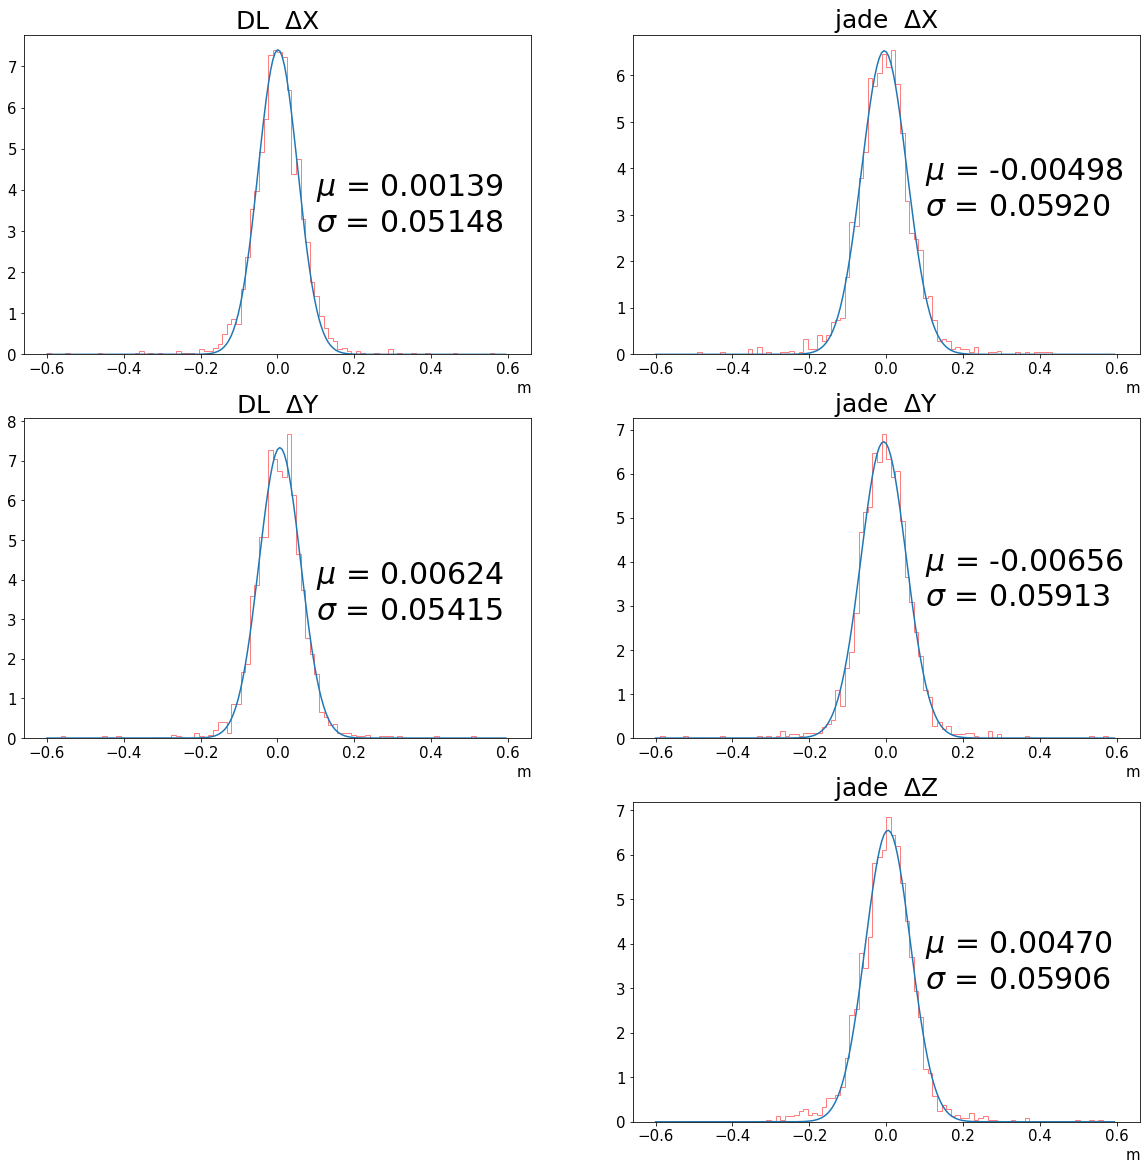

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 6


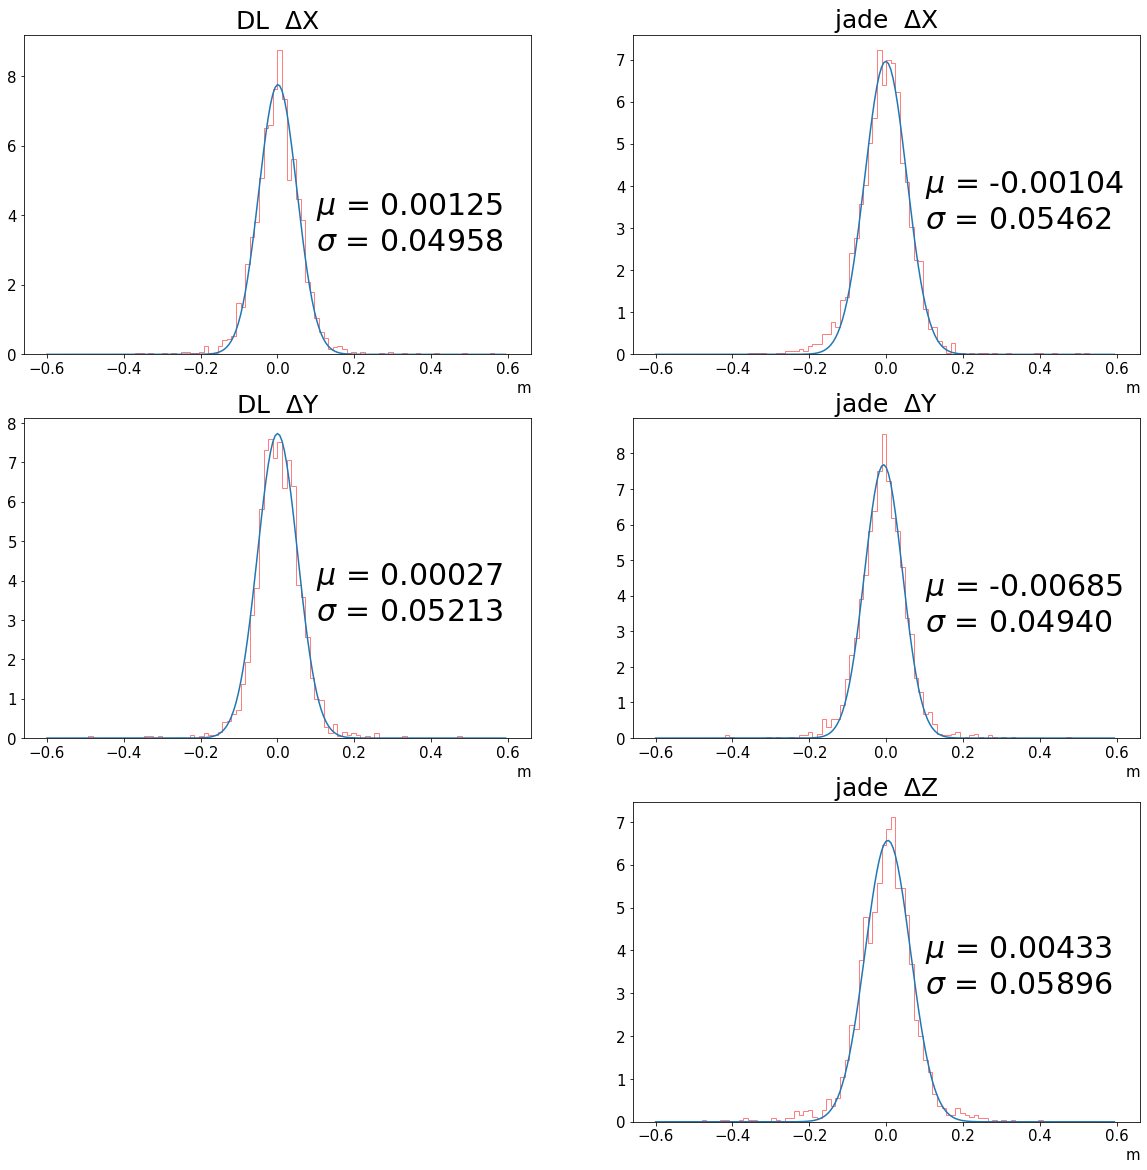

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 7


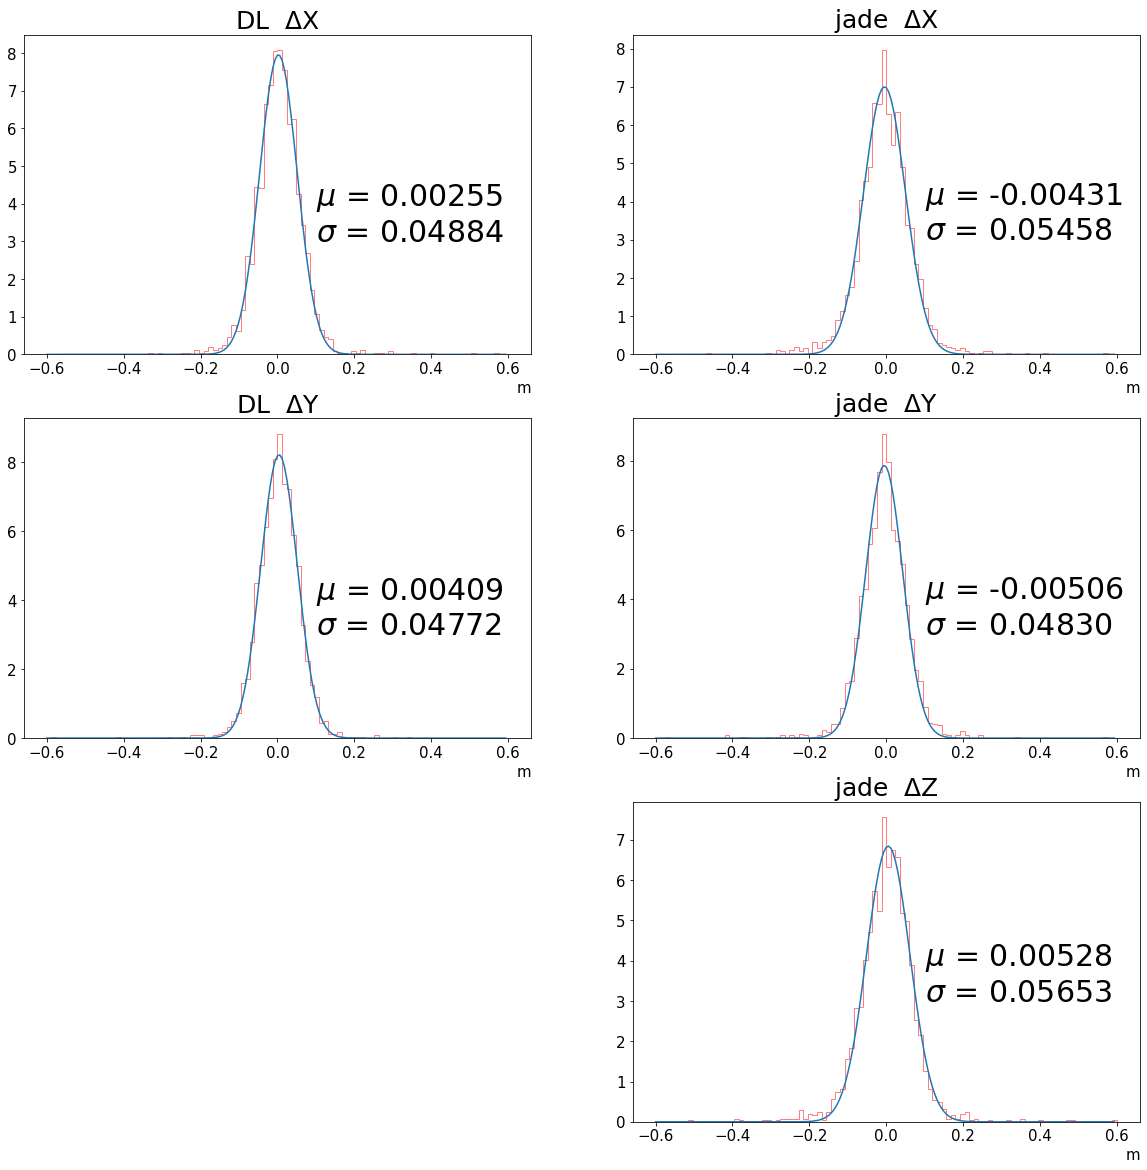

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 8


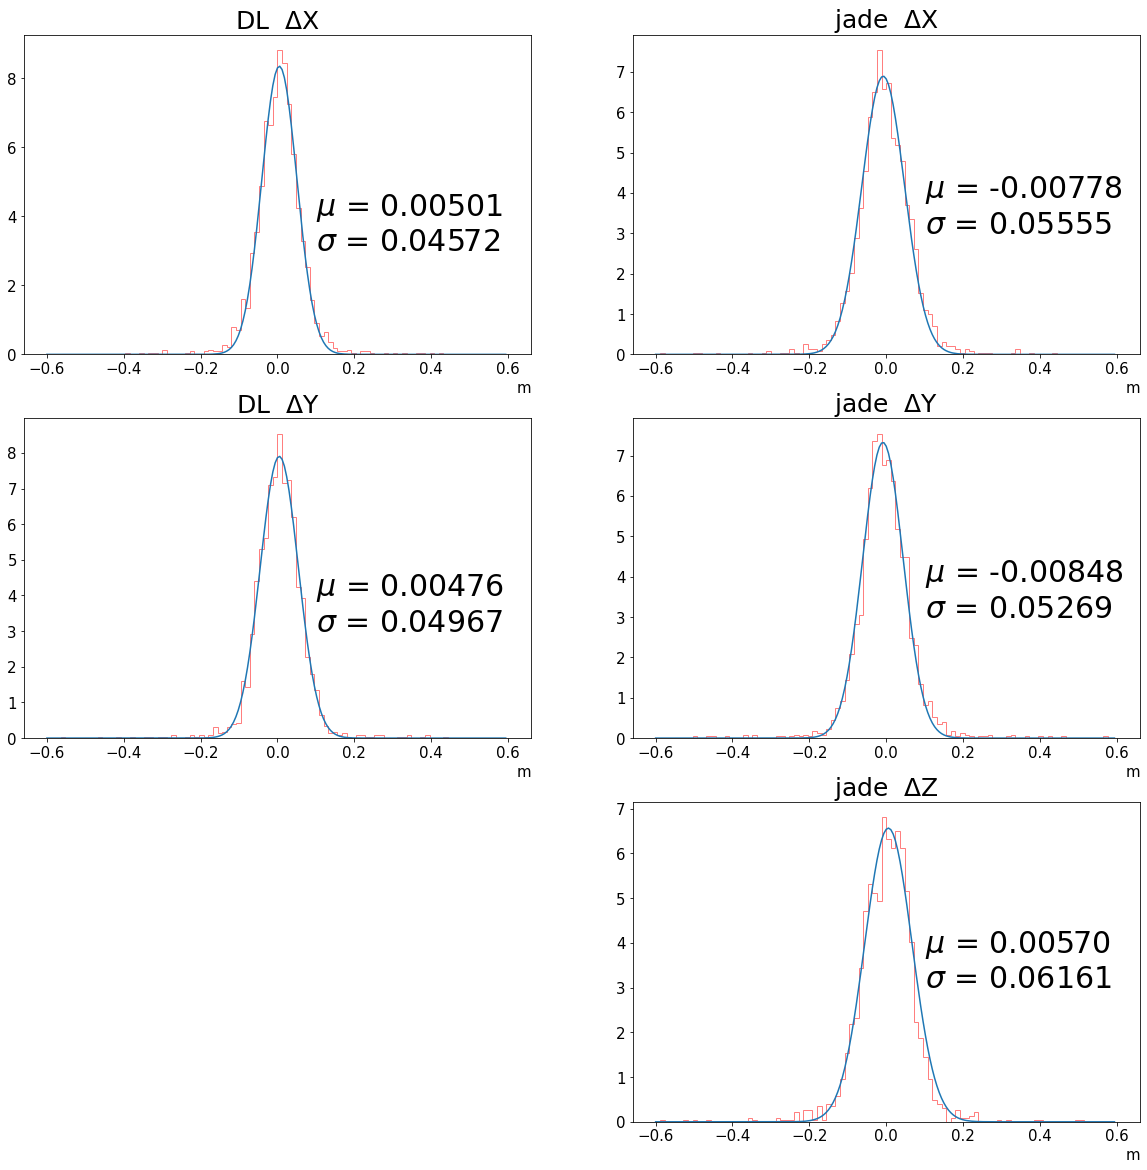

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 9


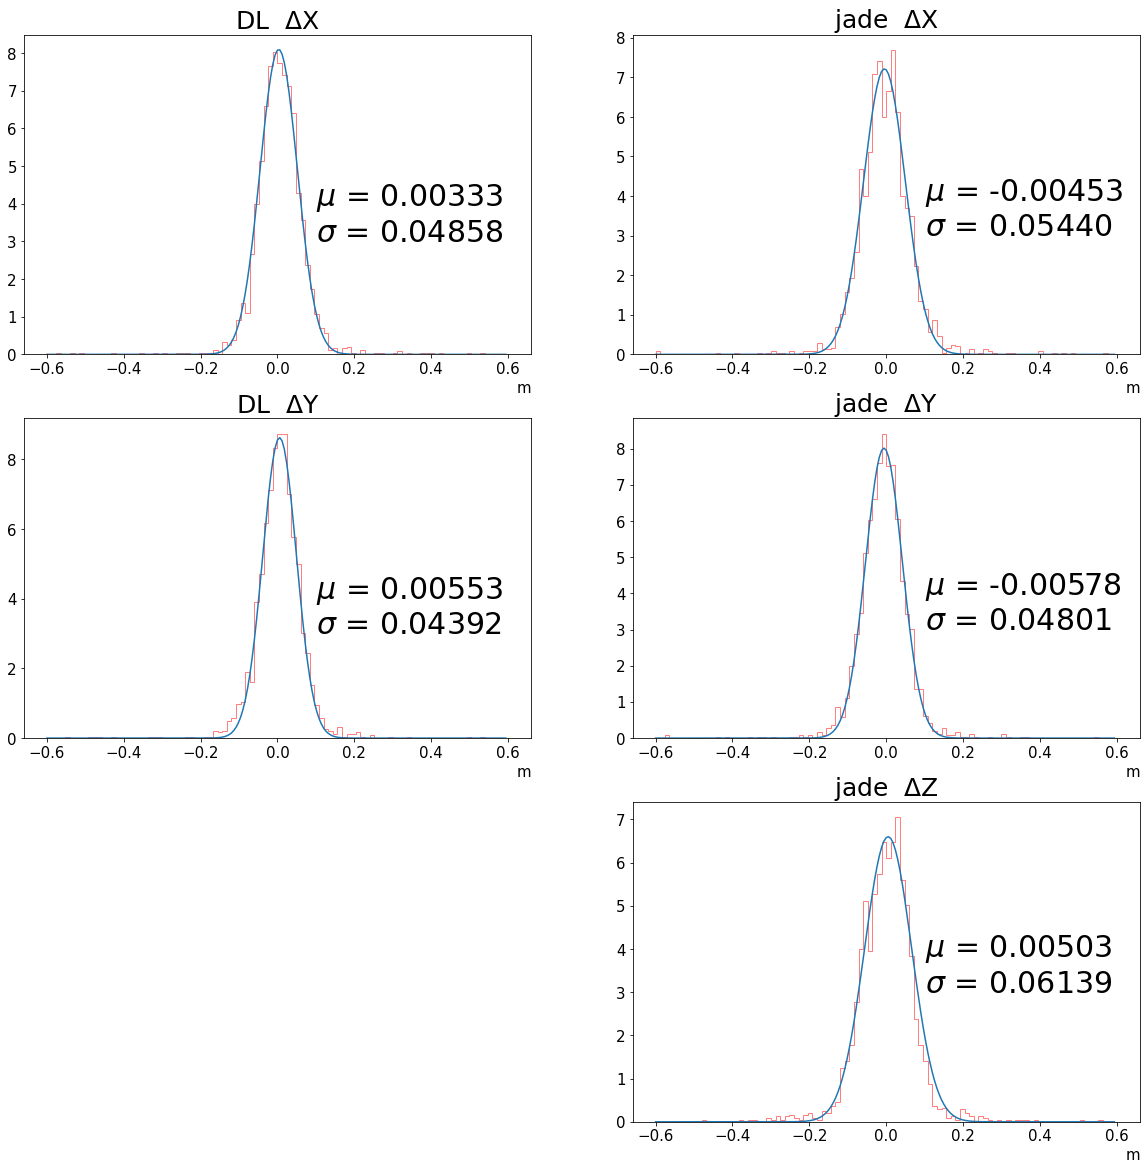

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


Energy = 10


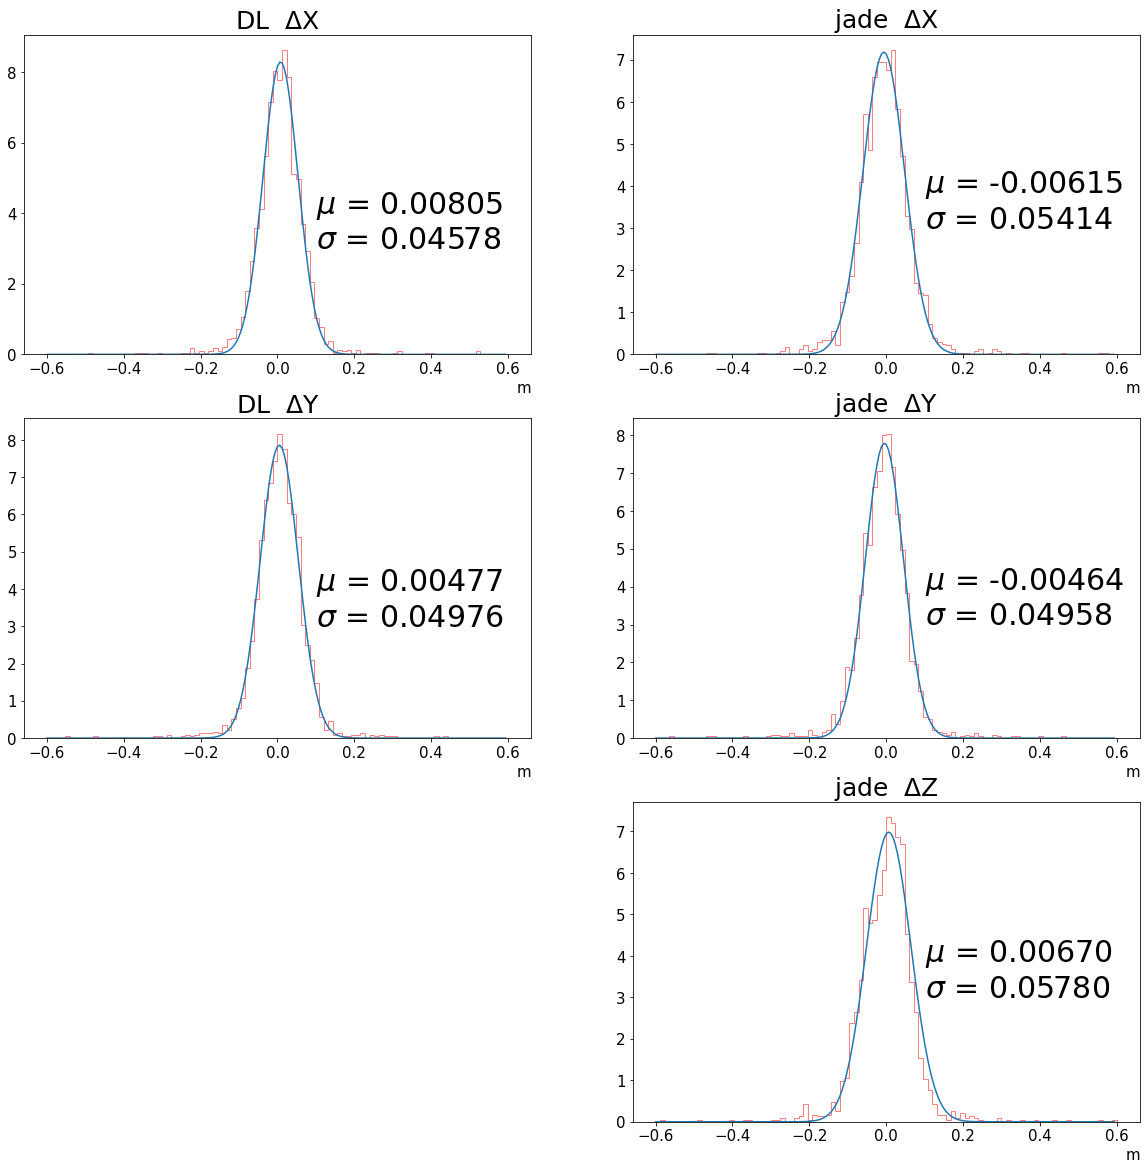

In [13]:
from scipy.optimize import curve_fit
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.subplot(3,2,1)
    tmp_hist = plt.hist(pred[:,0][energy == a] - label[:,0][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$X',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,3)

    tmp_hist = plt.hist(pred[:,1][energy == a] - label[:,1][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$Y',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    # plt.subplot(3,2,5)
    # tmp_hist = plt.hist(pred[:,2][energy == a] - label[:,2][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    # hist_N = tmp_hist[0]
    # hist_x = []
    # for i in range(len(tmp_hist[1])-1):
    #     tmp = tmp_hist[1]
    #     hist_x.append((tmp[i] + tmp[i+1])/2.)
    # hist_x = np.array(hist_x)

    # popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    # hist_xx = np.arange(-ran,ran,0.6/100.)
    # ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    # plt.title('DL  ' + r'$\Delta$Z',fontsize = 25)
    # plt.xticks(fontsize = 15)
    # plt.yticks(fontsize = 15)
    # plt.xlabel("m", fontsize=15, loc='right')
    # plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    # plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


    plt.subplot(3,2,2)
    tmp_hist = plt.hist(jade[:,0][energy == a] - label[:,0][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$X',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,4)

    tmp_hist = plt.hist(jade[:,1][energy == a] - label[:,1][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Y',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,6)
    tmp_hist = plt.hist(jade[:,2][energy == a] - label[:,2][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran, ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Z',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    print('Energy = ' + str(a))
    
    
    plt.show()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

3.0890170240228287 -0.014160992472135434
2.9454337953825678 -0.006486564152630266
1.02431207535888 -0.9378027951822835
4.6660072659732466 -0.003147697325336953
4.781073821323742 0.0003632857447296271
0.9961355511623124 -1.4295377748711908
5.693170277441091 -0.0036253132859900895
5.688418764266923 0.0007302572966404442
0.9390260533601069 -0.24113419441664147
6.859423555070944 -0.00026872447561653967
6.7259249116845465 0.004180558889292246
8.00331868531293 223.84157299028988
7.40789474151108 0.0013911425428140116
7.33221487086141 0.006241364103851581
0.9463637334472333 -0.0008334335724159545
7.759921740559485 0.001249458873124665
7.732040721523493 0.00026750361621913447
29.689705223053913 115.0105301307848
7.958485171436615 0.0025463005378513746
8.209308052738404 0.004090255177990644
0.9262912042620747 0.19112963020061582
8.340060255105504 0.005011848501405278
7.903642931455017 0.004758752997519743
130318729849.3027 227.62452169350527
8.096930311349777 0.003333005210605019
8.624304827889

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


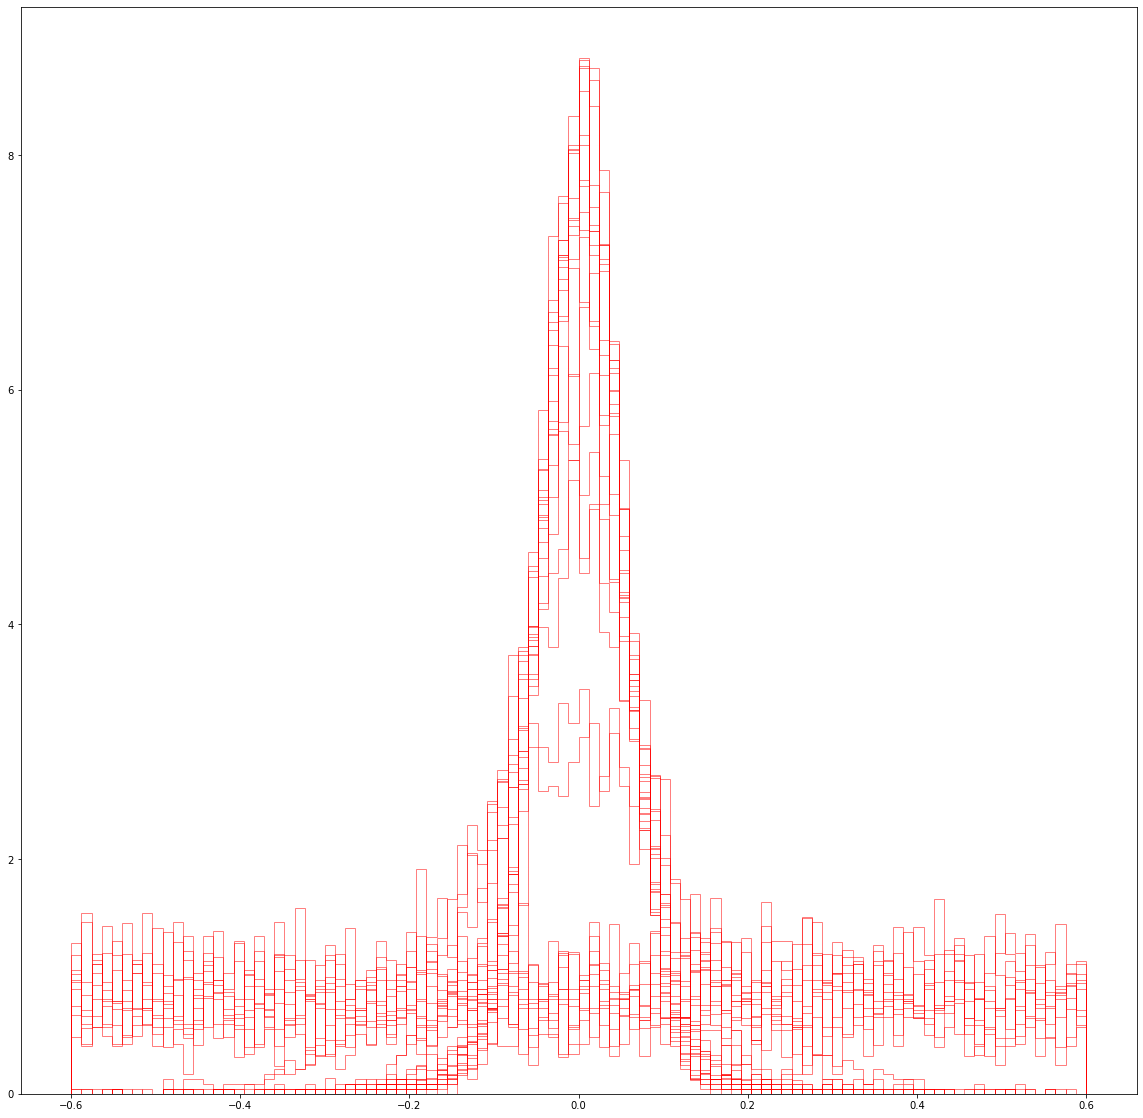

In [14]:
re_mu_x = []
re_mu_y = []
re_mu_z = []

re_si_x = []
re_si_y = []
re_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):

    

        tmp_hist = plt.hist(pred[:,vtx][energy == a] - label[:,vtx][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev = 500000)
        print(popt[0], popt[1])
        if vtx == 0:
            re_mu_x.append(popt[1])
            re_si_x.append(popt[2])
        if vtx == 1:
            re_mu_y.append(popt[1])
            re_si_y.append(popt[2])
        if vtx == 2:
            re_mu_z.append(popt[1])
            re_si_z.append(popt[2])

        

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

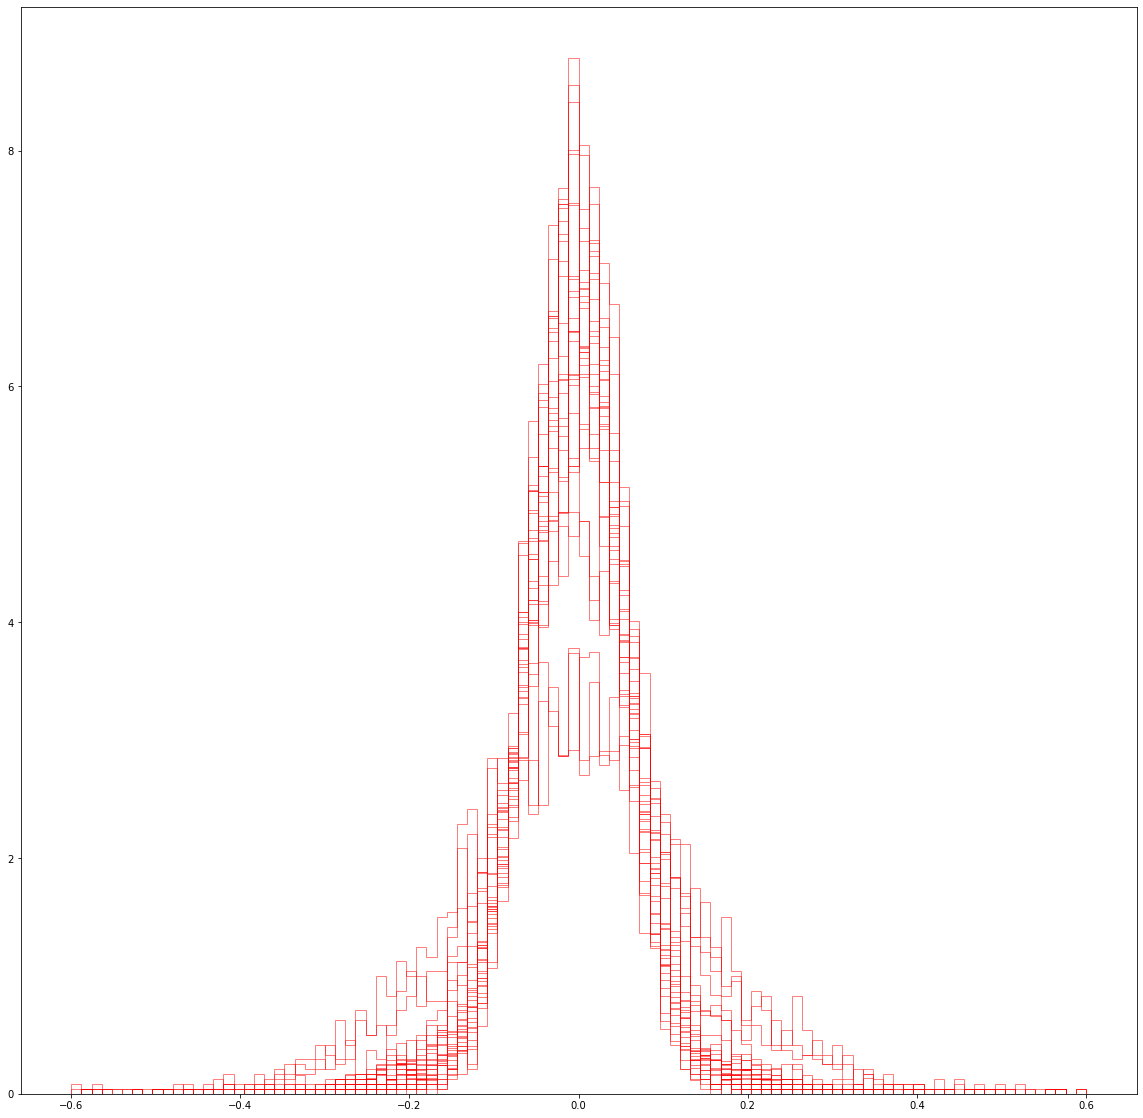

In [15]:
ja_mu_x = []
ja_mu_y = []
ja_mu_z = []

ja_si_x = []
ja_si_y = []
ja_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist(jade[:,vtx][energy == a] - label[:,vtx][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev = 5000)
        if vtx == 0:
            ja_mu_x.append(popt[1])
            ja_si_x.append(popt[2])
        if vtx == 1:
            ja_mu_y.append(popt[1])
            ja_si_y.append(popt[2])
        if vtx == 2:
            ja_mu_z.append(popt[1])
            ja_si_z.append(popt[2])
        

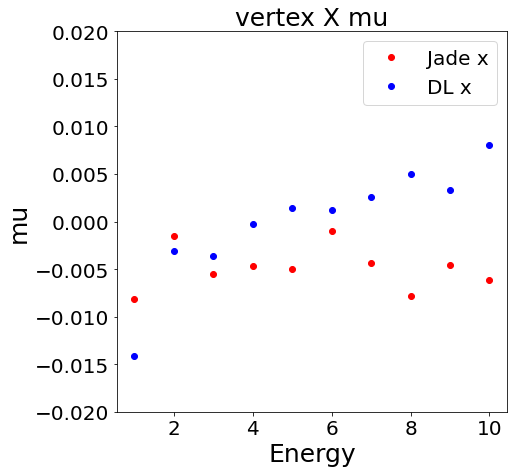

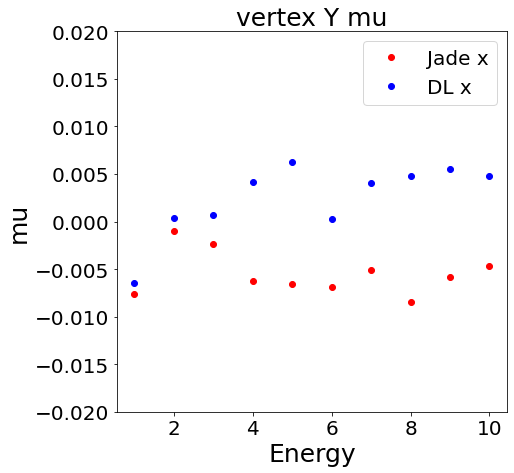

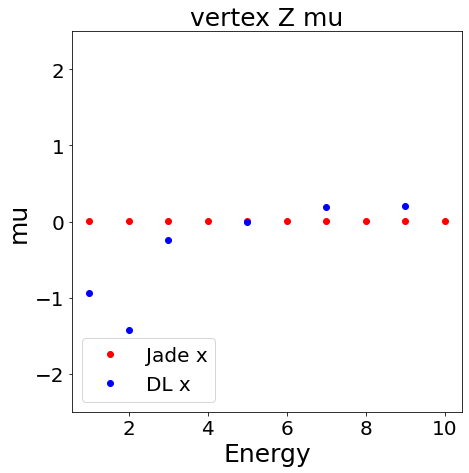

In [16]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,(ja_mu_x),'or',label = 'Jade x')
plt.plot(energy_list,(re_mu_x),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex X mu',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,(ja_mu_y),'or',label = 'Jade x')
plt.plot(energy_list,(re_mu_y),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Y mu',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()


plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,(ja_mu_z),'or',label = 'Jade x')
plt.plot(energy_list,(re_mu_z),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-2.5,2.5])
plt.legend(fontsize=20)
plt.show()


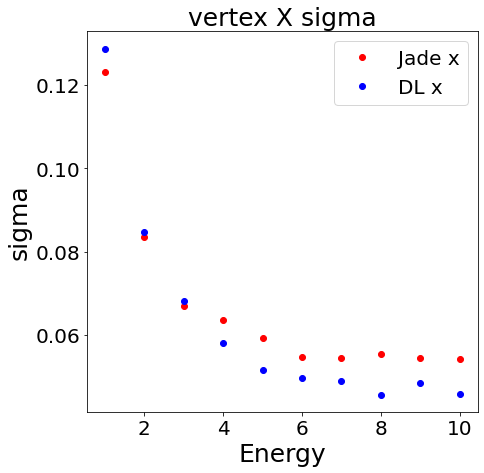

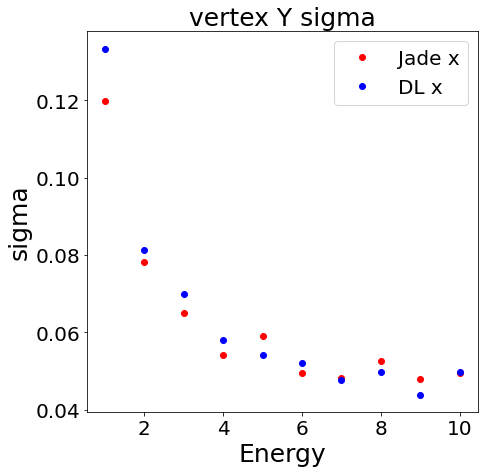

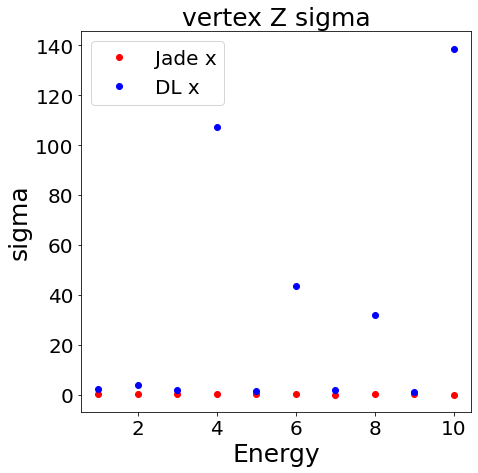

In [17]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,np.abs(ja_si_x),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_x),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex X sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,np.abs(ja_si_y),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_y),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Y sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()


plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,np.abs(ja_si_z),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_z),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Z sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()


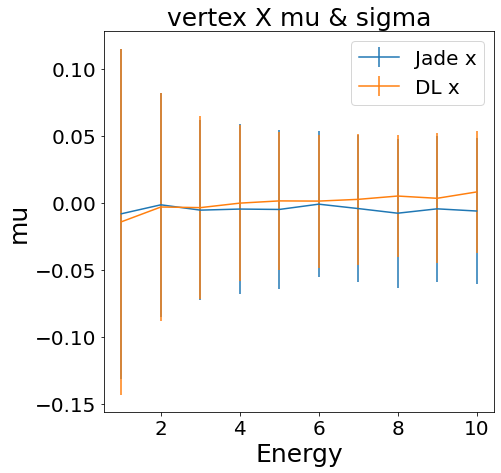

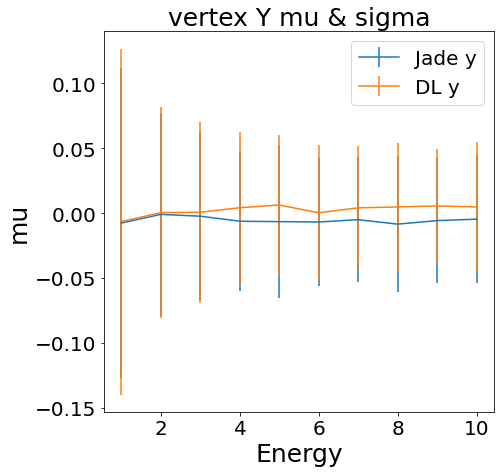

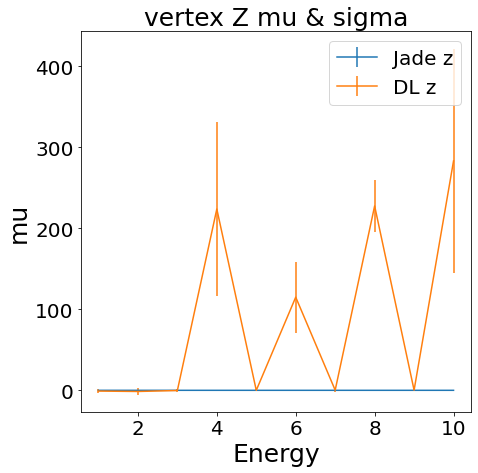

In [18]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,ja_mu_x,yerr=ja_si_x,label = 'Jade x')
plt.errorbar(energy_list,re_mu_x,yerr=re_si_x,label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex X mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)
plt.show()
plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y,label = 'Jade y')
plt.errorbar(energy_list,re_mu_y,yerr=re_si_y,label = 'DL y')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Y mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)
plt.show()
plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z,label = 'Jade z')
plt.errorbar(energy_list,re_mu_z,yerr=re_si_z,label = 'DL z')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Z mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)
plt.show()

In [19]:
# plt.subplot(4,1,1)
R2_label = np.power(label[:,0],2)+np.power(label[:,1],2)
R2_pred = np.power(pred[:,0],2)+np.power(pred[:,1],2)
Z_label = label[:,2]
Z_pred = pred[:,2]
R2_jade = np.power(jade[:,0],2)+np.power(jade[:,1],2)
Z_jade = jade[:,2]

In [20]:
ZZ = [8,0.4,-0.4,-8]

RR = [0,0.7,1.4,20]

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

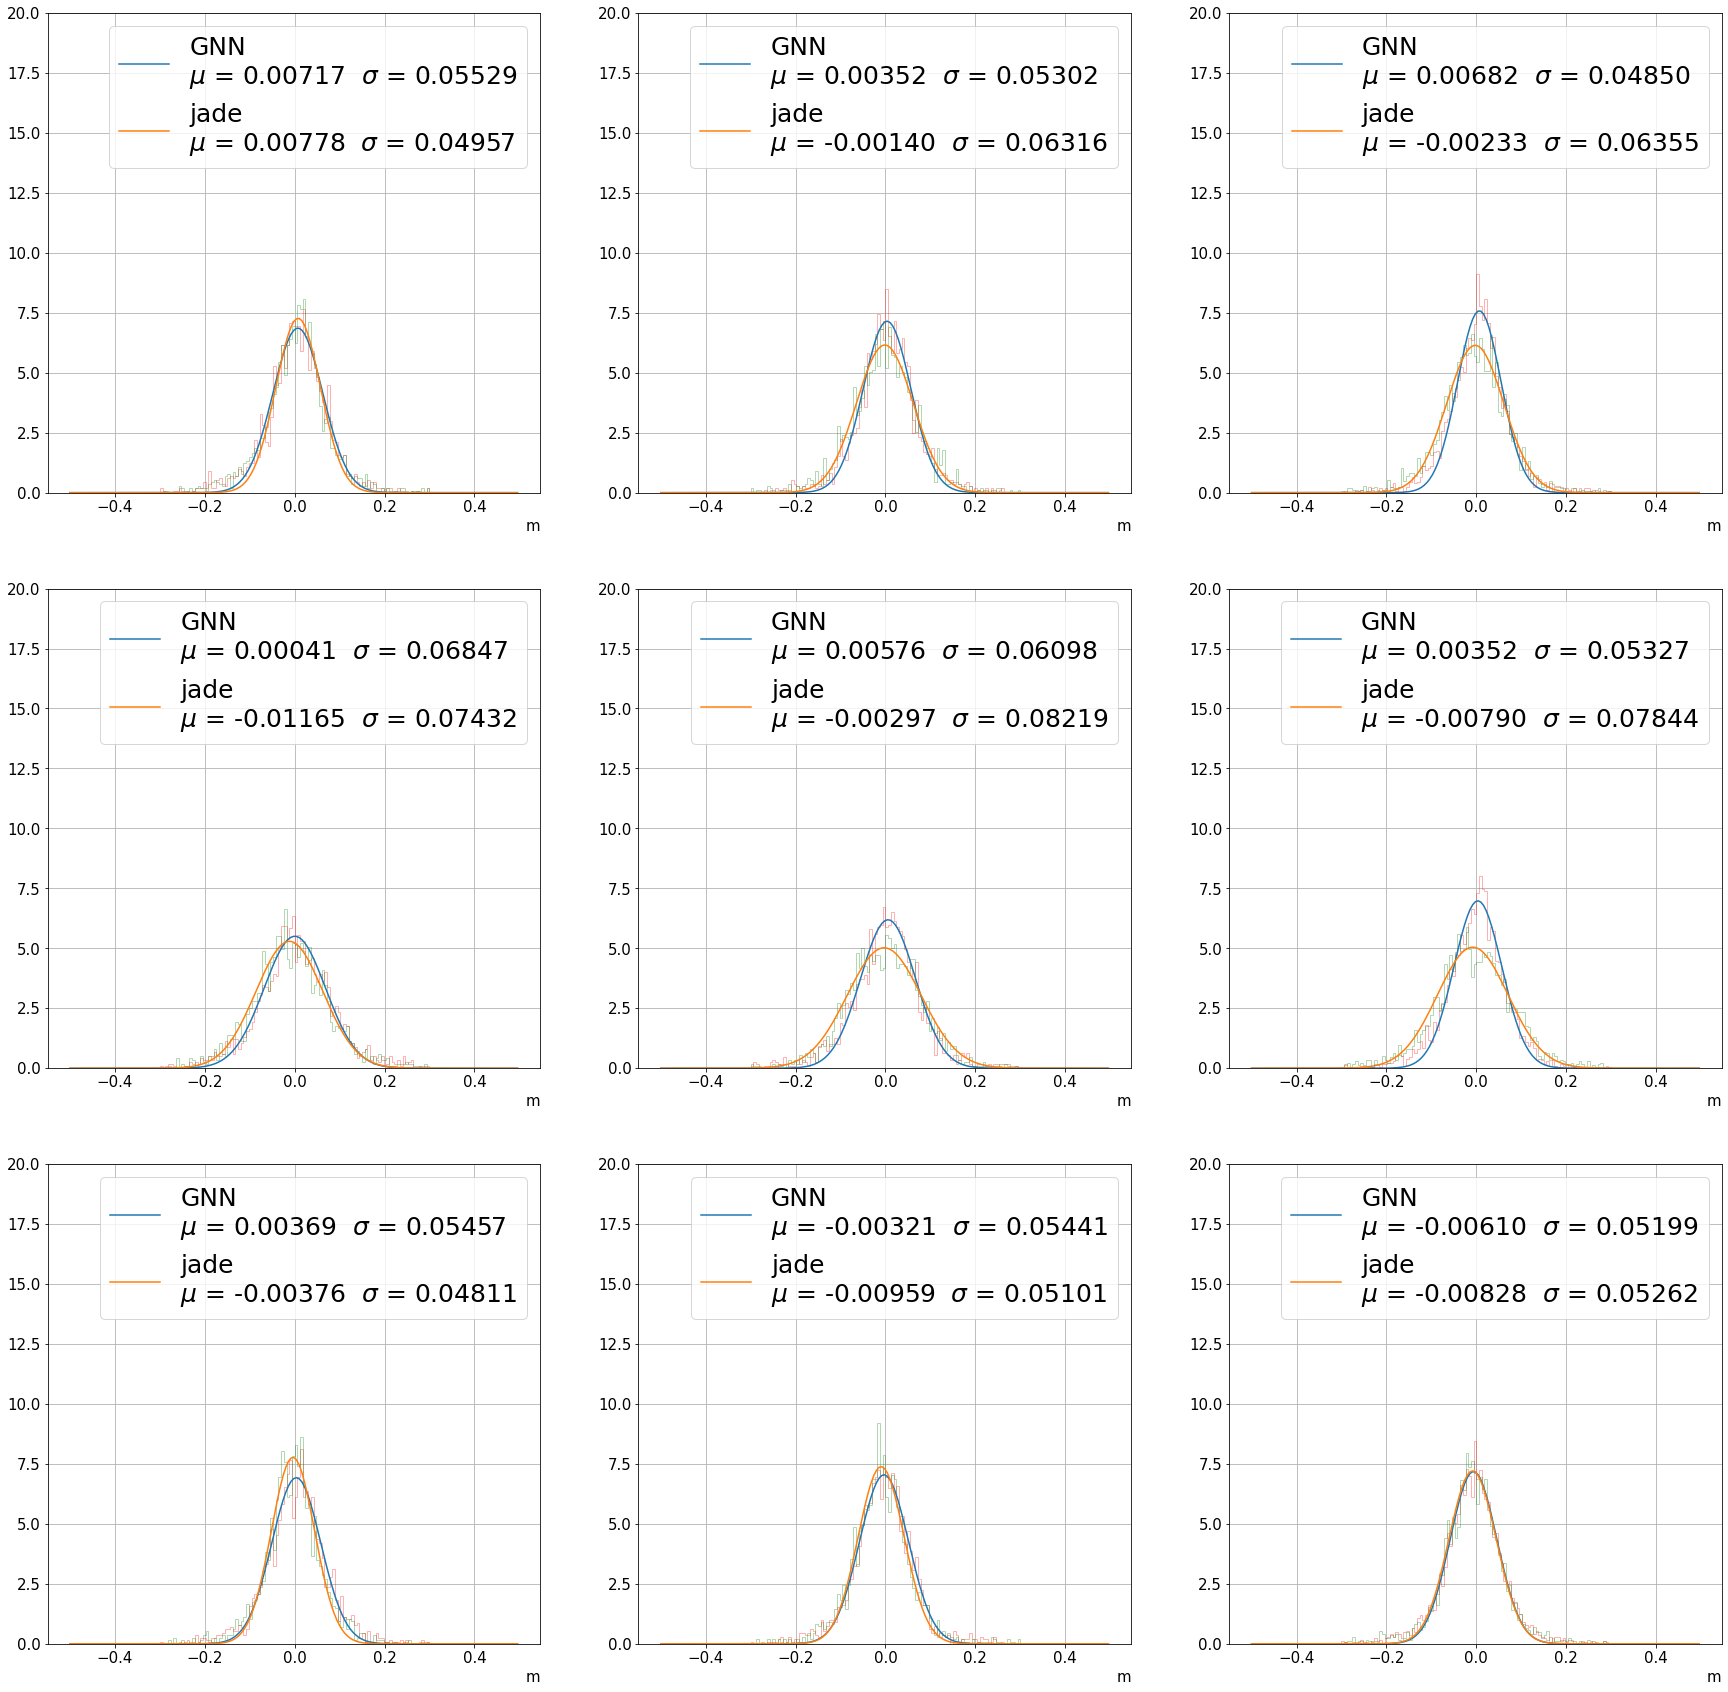

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

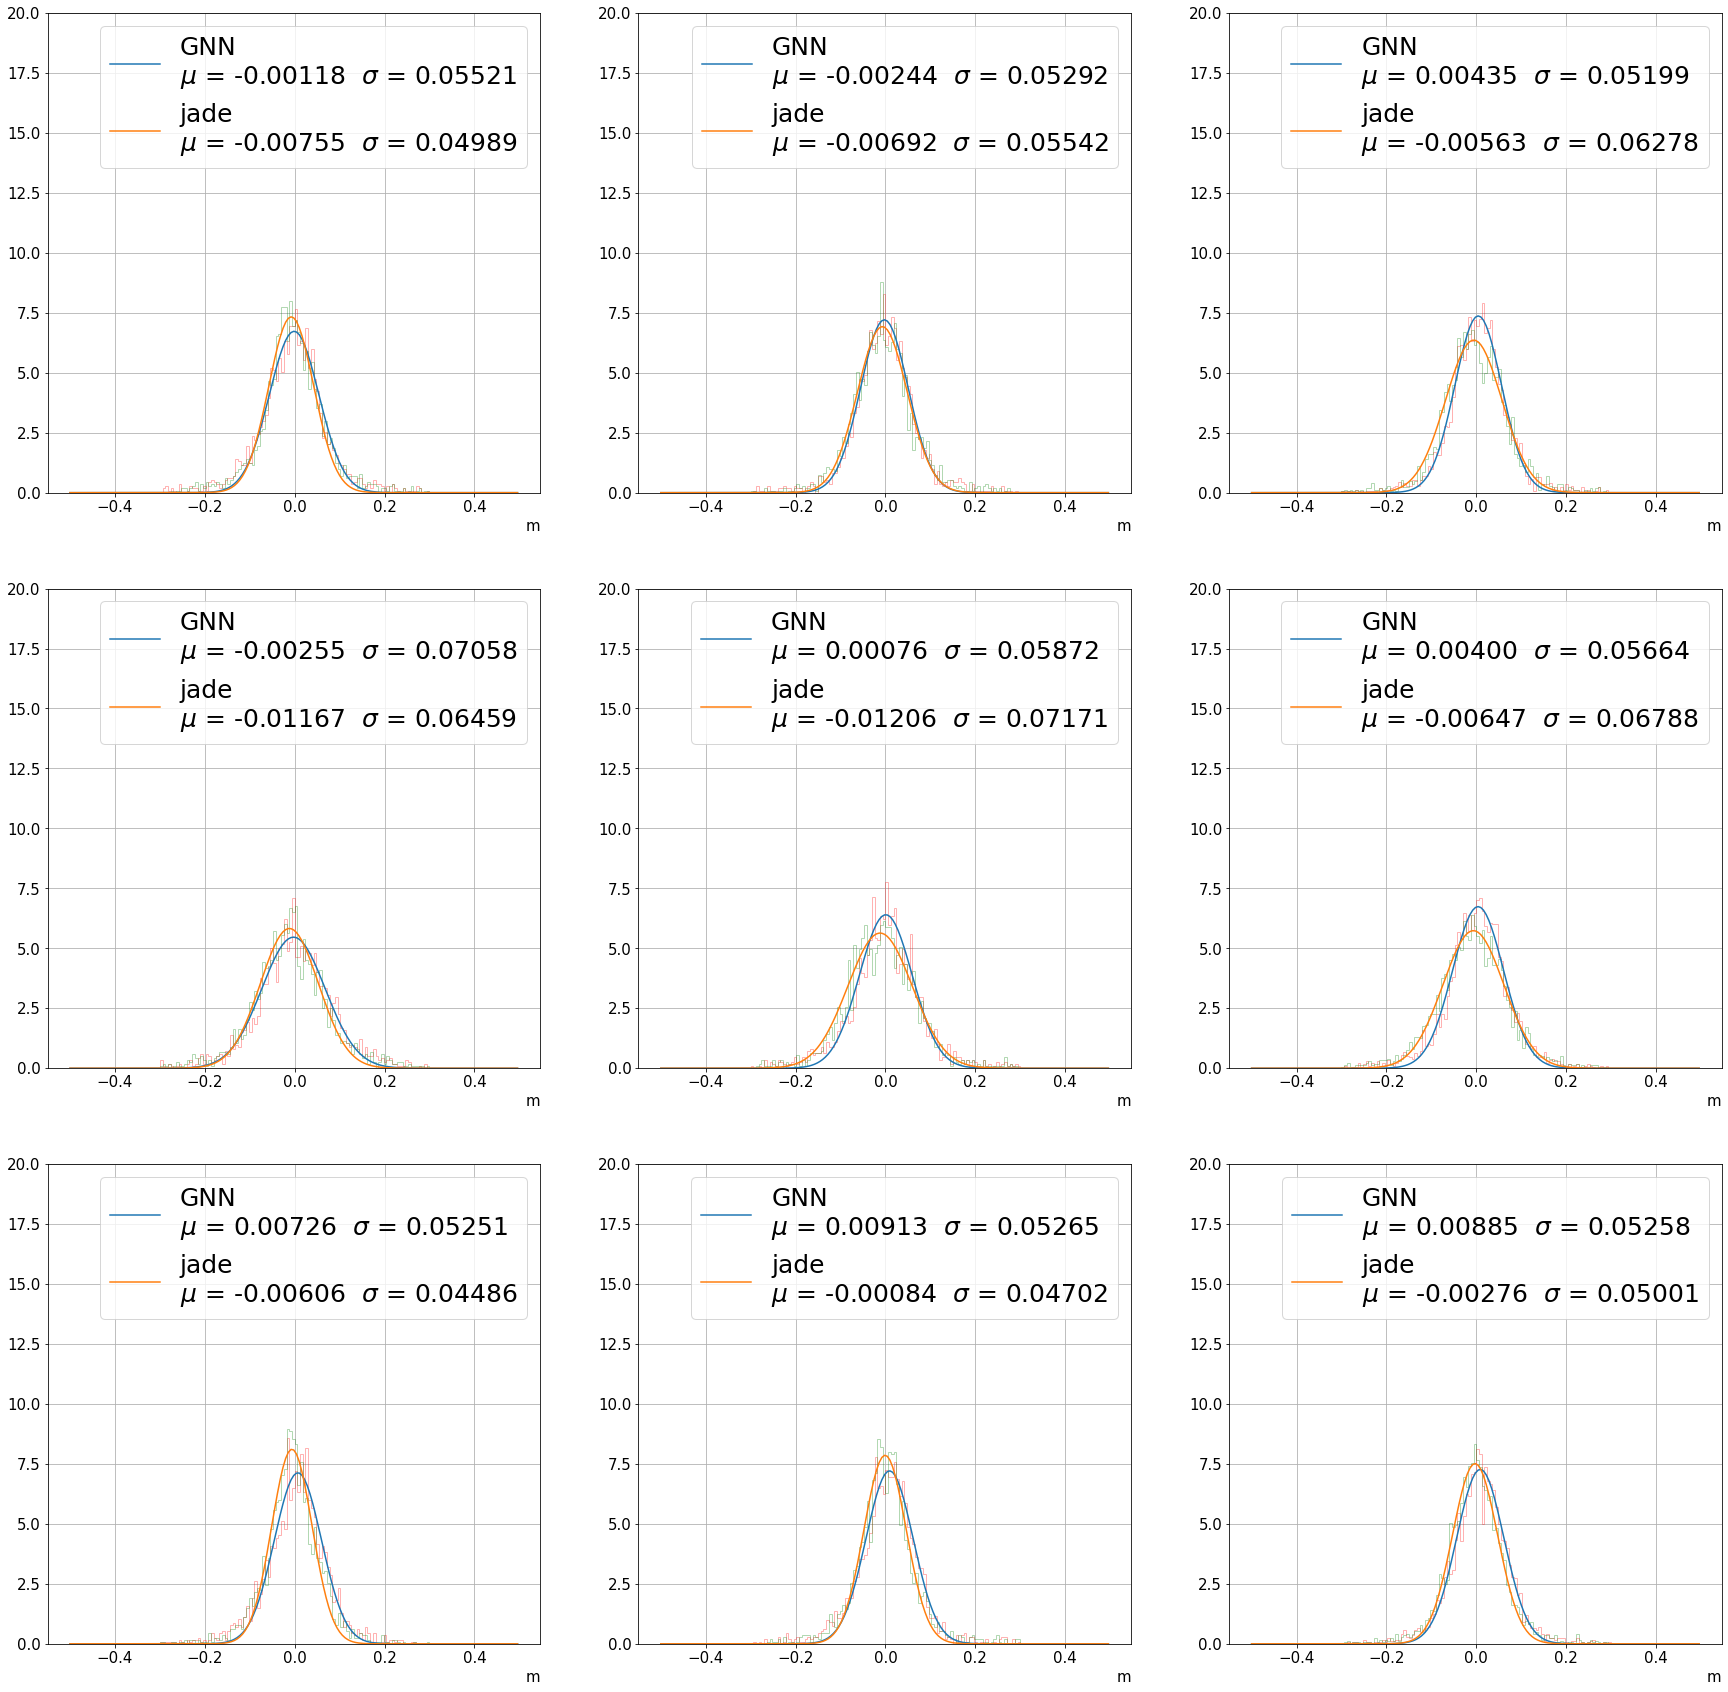

/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


ValueError: array must not contain infs or NaNs

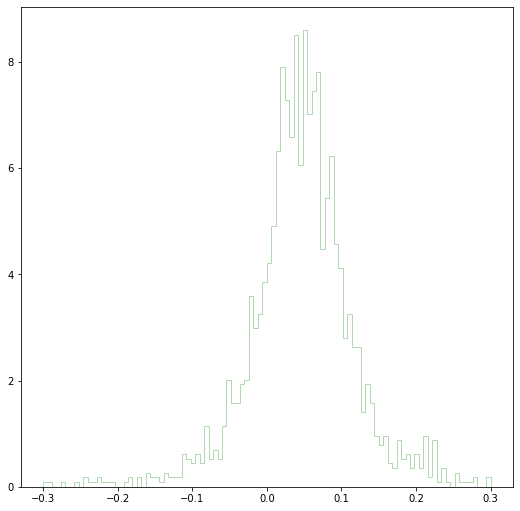

In [21]:
for ver in range(3):
##################
    plt.rcParams['figure.figsize'] = (30, 30)
    for k in range(3):
        for j in range(3):


            plt.subplot(3,3,3*k+(j+1))

            tmp_hist = plt.hist(pred[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.3, density = True, histtype = 'step')
            tmp_hist_jade = plt.hist(jade[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.3, density = True, histtype = 'step')

            hist_N = tmp_hist[0]
            hist_x = []

            hist_N_jade = tmp_hist_jade[0]
            hist_x_jade = []

            for i in range(len(tmp_hist[1])-1):
                tmp = tmp_hist[1]
                hist_x.append((tmp[i] + tmp[i+1])/2.)
            hist_x = np.array(hist_x)

            for i in range(len(tmp_hist_jade [1])-1):
                tmp_jade  = tmp_hist_jade [1]
                hist_x_jade .append((tmp_jade [i] + tmp_jade [i+1])/2.)
            hist_x_jade  = np.array(hist_x_jade )

            popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
            hist_xx = np.arange(-0.5, 0.5,0.6/100.)


            popt_jade, pcov_jade = curve_fit(gaussian, hist_x_jade, hist_N_jade, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N_jade), absolute_sigma=True)
            hist_xx_jade = np.arange(-0.5, 0.5,0.6/100.)


            ##A = popt[0]; mu = popt[1]; sigma = popt[2]
        #         plt.title(r'$\Delta$X',fontsize = 25)
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)

            plt.xlabel("m", fontsize=15, loc='right')
        #         plt.text(-0.3,15,'GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=10)
            plt.plot(hist_xx, gaussian(hist_xx,*popt),label='GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt[2]):.5f}")


        #         plt.text(0,15,'jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}",fontsize=10)
            plt.plot(hist_xx_jade, gaussian(hist_xx_jade,*popt_jade),label='jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}")
        #         plt.vlines(0,0,15,colors='red')
            plt.grid()
            plt.ylim([0,20])        
            plt.legend(fontsize = 25)
    plt.show()

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

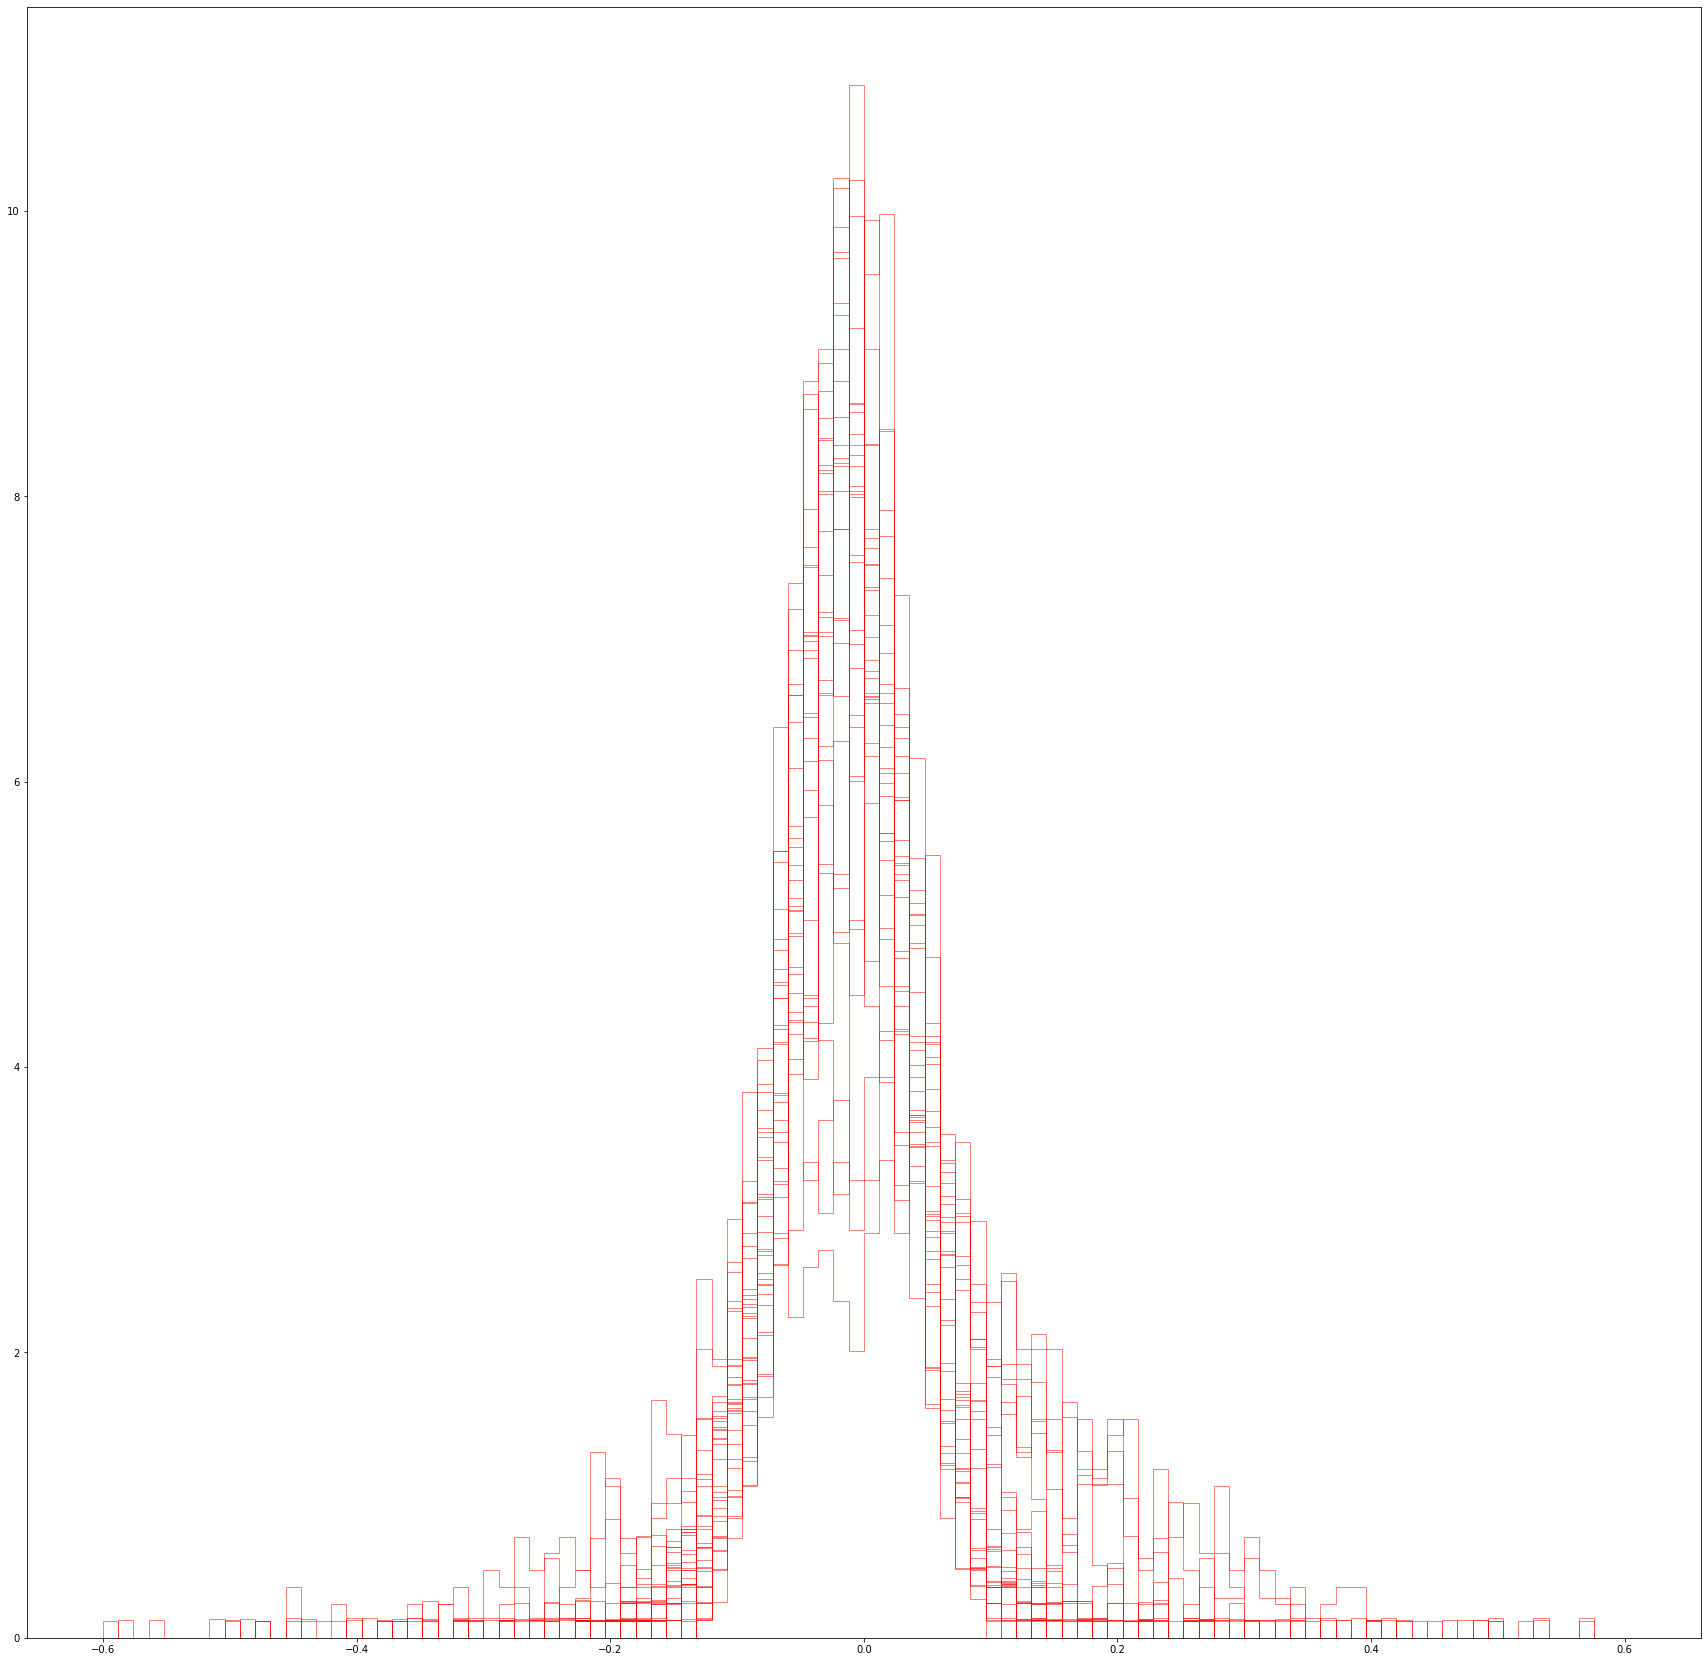

In [ ]:


Z_re_mu_z_up = []
Z_re_mu_z_mi = []
Z_re_mu_z_do = []

Z_re_si_z_up = []
Z_re_si_z_mi = []
Z_re_si_z_do = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(3):    
        tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_re_mu_z_up.append(popt[1])
            Z_re_si_z_up.append(popt[2])
        if k == 1:
            Z_re_mu_z_mi.append(popt[1])
            Z_re_si_z_mi.append(popt[2])
        if k == 2:
            Z_re_mu_z_do.append(popt[1])
            Z_re_si_z_do.append(popt[2])




/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

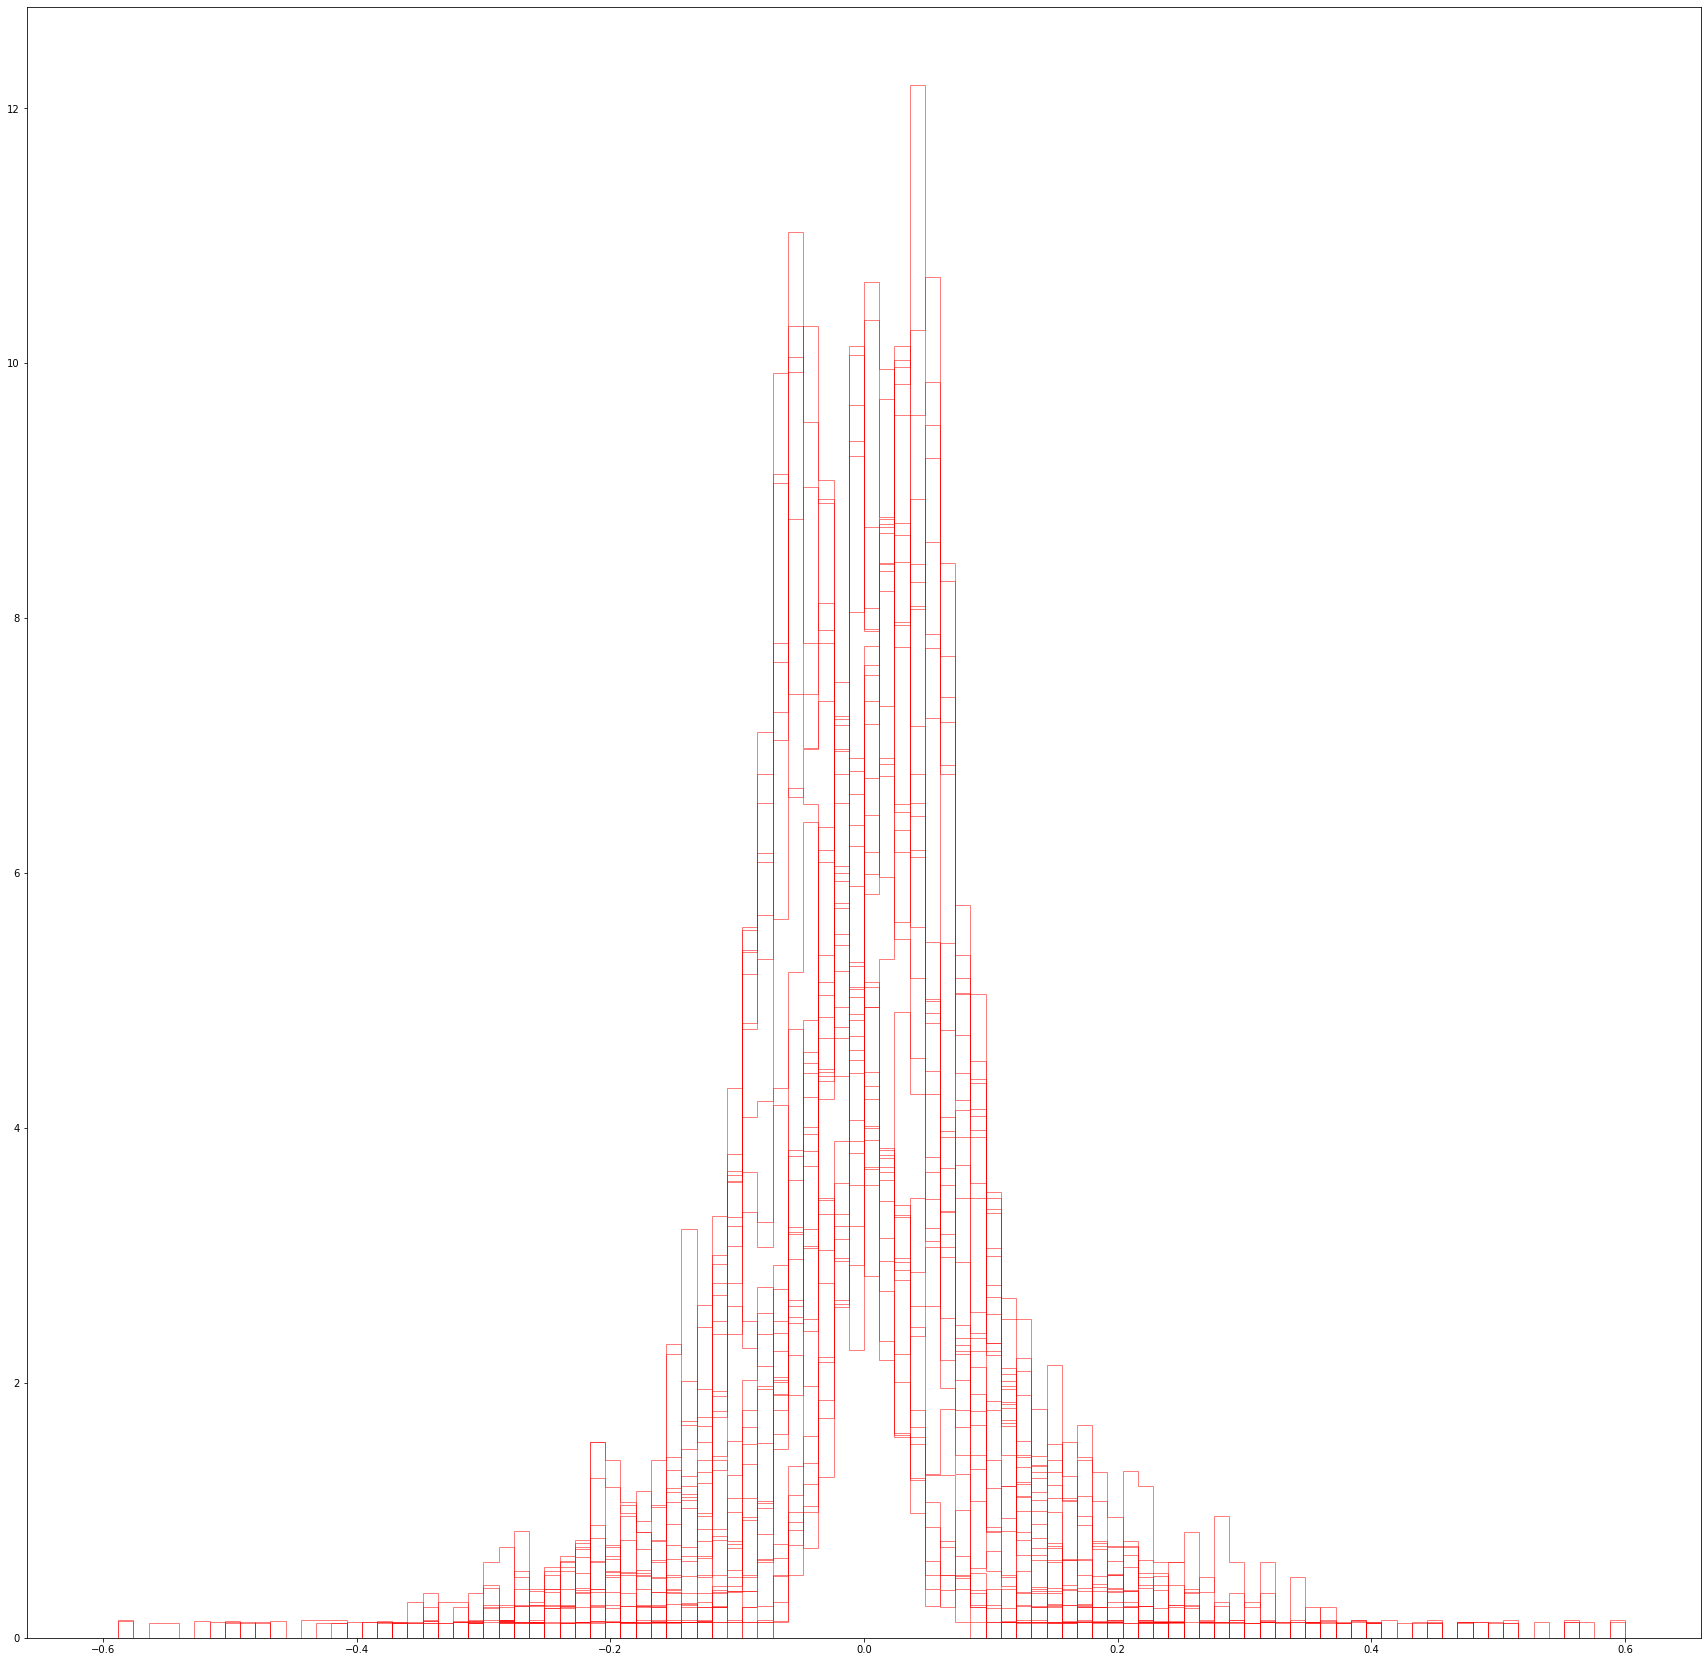

In [ ]:

Z_ja_mu_z_up = []
Z_ja_mu_z_mi = []
Z_ja_mu_z_do = []

Z_ja_si_z_up = []
Z_ja_si_z_mi = []
Z_ja_si_z_do = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(3):    
        tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
        if k == 0:
            Z_ja_mu_z_up.append(popt[1])
            Z_ja_si_z_up.append(popt[2])
        if k == 1:
            Z_ja_mu_z_mi.append(popt[1])
            Z_ja_si_z_mi.append(popt[2])
        if k == 2:
            Z_ja_mu_z_do.append(popt[1])
            Z_ja_si_z_do.append(popt[2])



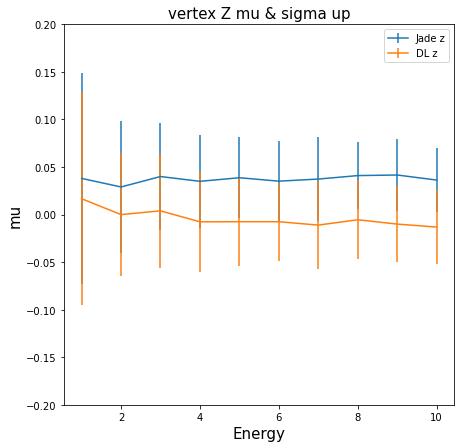

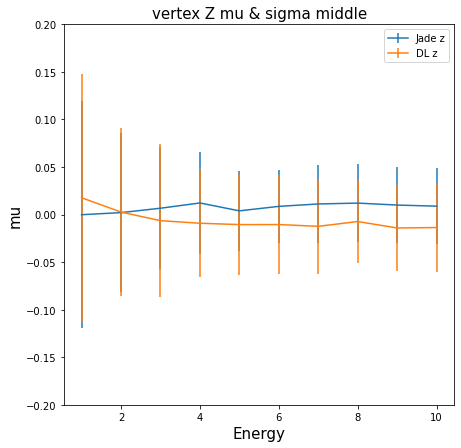

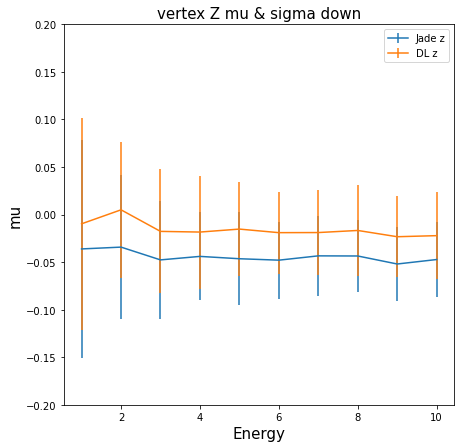

In [ ]:

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_up,yerr=Z_ja_si_z_up,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_up,yerr=Z_re_si_z_up,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()


plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_mi,yerr=Z_ja_si_z_mi,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_mi,yerr=Z_re_si_z_mi,label = 'DL z')
plt.title('vertex Z mu & sigma middle',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_do,yerr=Z_ja_si_z_do,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_do,yerr=Z_re_si_z_do,label = 'DL z')
plt.title('vertex Z mu & sigma down',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

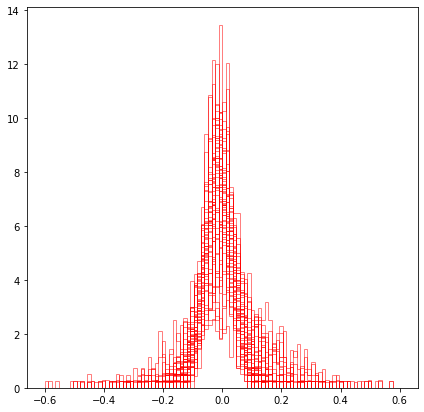

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_re_mu_z_1 = []
Z_re_mu_z_2 = []
Z_re_mu_z_3 = []
Z_re_mu_z_4 = []
Z_re_mu_z_5 = []
Z_re_mu_z_6 = []

Z_re_si_z_1 = []
Z_re_si_z_2 = []
Z_re_si_z_3 = []
Z_re_si_z_4 = []
Z_re_si_z_5 = []
Z_re_si_z_6 = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(6):    
        tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_re_mu_z_1.append(popt[1])
            Z_re_si_z_1.append(popt[2])
        if k == 1:
            Z_re_mu_z_2.append(popt[1])
            Z_re_si_z_2.append(popt[2])
        if k == 2:
            Z_re_mu_z_3.append(popt[1])
            Z_re_si_z_3.append(popt[2])
        if k == 3:
            Z_re_mu_z_4.append(popt[1])
            Z_re_si_z_4.append(popt[2])
        if k == 4:
            Z_re_mu_z_5.append(popt[1])
            Z_re_si_z_5.append(popt[2])        
        if k == 5:
            Z_re_mu_z_6.append(popt[1])
            Z_re_si_z_6.append(popt[2])        
        
        
        
        

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

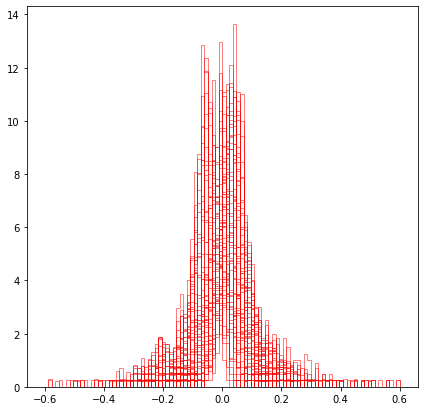

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []
Z_ja_mu_z_6 = []

Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []
Z_ja_si_z_6 = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(6):    
        tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (energy == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_ja_mu_z_1.append(popt[1])
            Z_ja_si_z_1.append(popt[2])
        if k == 1:
            Z_ja_mu_z_2.append(popt[1])
            Z_ja_si_z_2.append(popt[2])
        if k == 2:
            Z_ja_mu_z_3.append(popt[1])
            Z_ja_si_z_3.append(popt[2])
        if k == 3:
            Z_ja_mu_z_4.append(popt[1])
            Z_ja_si_z_4.append(popt[2])
        if k == 4:
            Z_ja_mu_z_5.append(popt[1])
            Z_ja_si_z_5.append(popt[2])        
        if k == 5:
            Z_ja_mu_z_6.append(popt[1])
            Z_ja_si_z_6.append(popt[2])        
        
        
        
        

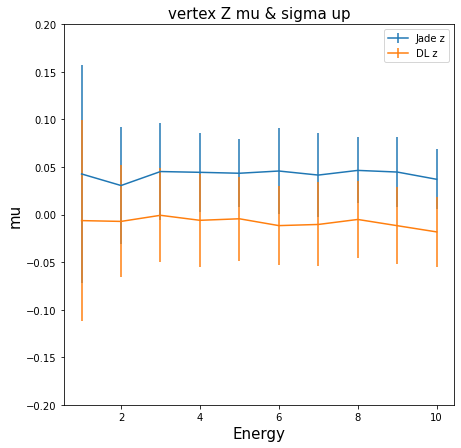

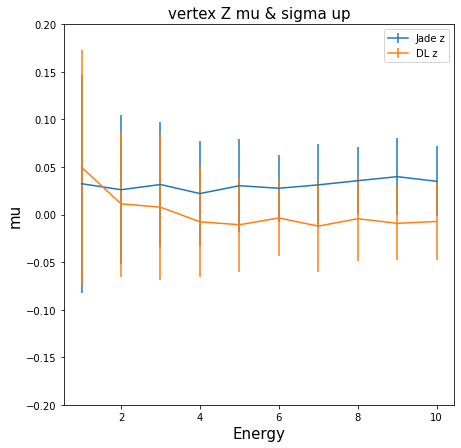

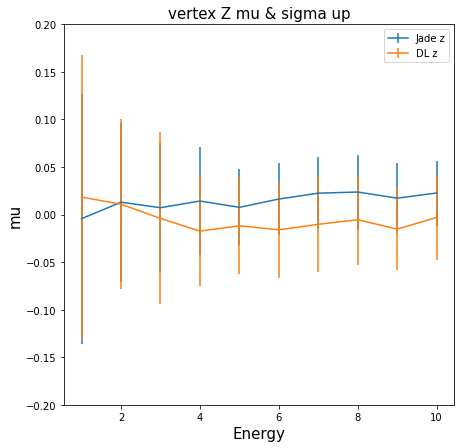

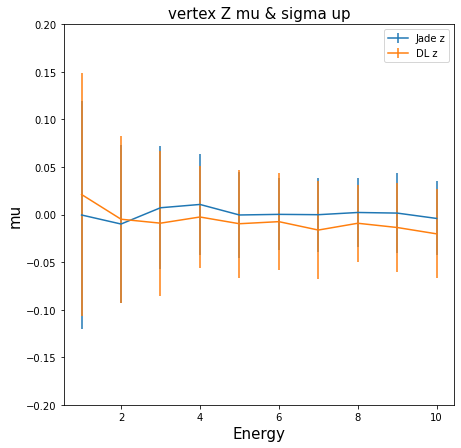

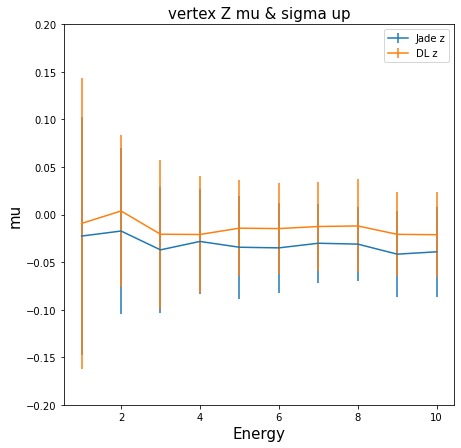

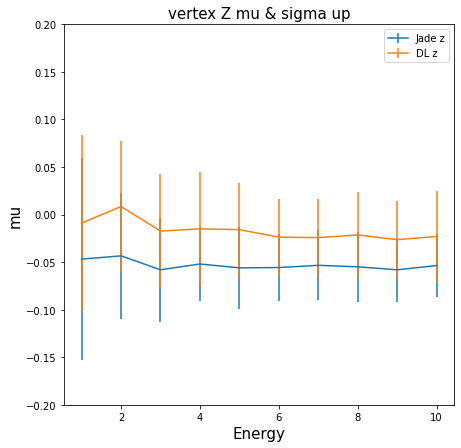

In [ ]:

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_1,yerr=Z_ja_si_z_1,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_1,yerr=Z_re_si_z_1,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_2,yerr=Z_ja_si_z_2,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_2,yerr=Z_re_si_z_2,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_3,yerr=Z_ja_si_z_3,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_3,yerr=Z_re_si_z_3,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_4,yerr=Z_ja_si_z_4,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_4,yerr=Z_re_si_z_4,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_5,yerr=Z_ja_si_z_5,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_5,yerr=Z_re_si_z_5,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (7, 7)
plt.errorbar(energy_list,Z_ja_mu_z_6,yerr=Z_ja_si_z_6,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_6,yerr=Z_re_si_z_6,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 15)
plt.xlabel('Energy',fontsize = 15)
plt.ylabel('mu',fontsize = 15)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


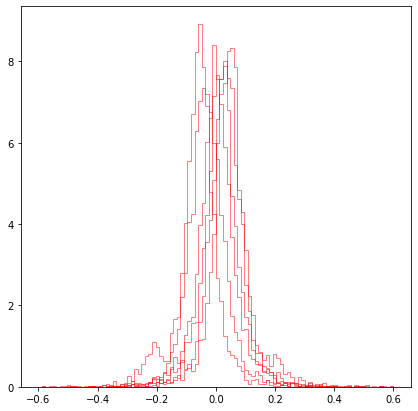

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []
Z_ja_mu_z_6 = []

Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []
Z_ja_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(6):    
    tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_ja_mu_z_1.append(popt[1])
        Z_ja_si_z_1.append(popt[2])
    if k == 1:
        Z_ja_mu_z_2.append(popt[1])
        Z_ja_si_z_2.append(popt[2])
    if k == 2:
        Z_ja_mu_z_3.append(popt[1])
        Z_ja_si_z_3.append(popt[2])
    if k == 3:
        Z_ja_mu_z_4.append(popt[1])
        Z_ja_si_z_4.append(popt[2])
    if k == 4:
        Z_ja_mu_z_5.append(popt[1])
        Z_ja_si_z_5.append(popt[2])        
    if k == 5:
        Z_ja_mu_z_6.append(popt[1])
        Z_ja_si_z_6.append(popt[2])        



        

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


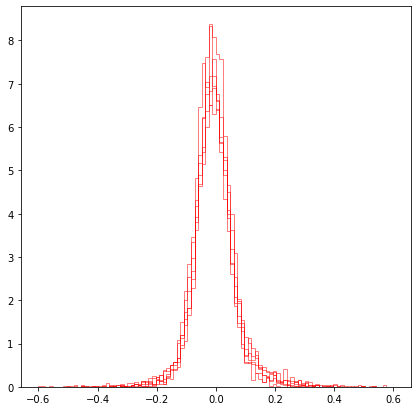

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_pr_mu_z_1 = []
Z_pr_mu_z_2 = []
Z_pr_mu_z_3 = []
Z_pr_mu_z_4 = []
Z_pr_mu_z_5 = []
Z_pr_mu_z_6 = []

Z_pr_si_z_1 = []
Z_pr_si_z_2 = []
Z_pr_si_z_3 = []
Z_pr_si_z_4 = []
Z_pr_si_z_5 = []
Z_pr_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(6):    
    tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_pr_mu_z_1.append(popt[1])
        Z_pr_si_z_1.append(popt[2])
    if k == 1:
        Z_pr_mu_z_2.append(popt[1])
        Z_pr_si_z_2.append(popt[2])
    if k == 2:
        Z_pr_mu_z_3.append(popt[1])
        Z_pr_si_z_3.append(popt[2])
    if k == 3:
        Z_pr_mu_z_4.append(popt[1])
        Z_pr_si_z_4.append(popt[2])
    if k == 4:
        Z_pr_mu_z_5.append(popt[1])
        Z_pr_si_z_5.append(popt[2])        
    if k == 5:
        Z_pr_mu_z_6.append(popt[1])
        Z_pr_si_z_6.append(popt[2])        



        

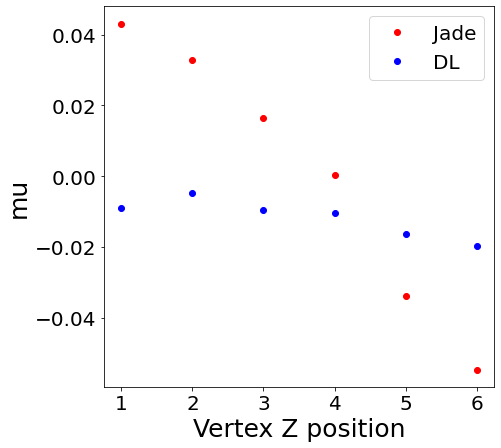

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_ja_mu_z_1,Z_ja_mu_z_2,Z_ja_mu_z_3,Z_ja_mu_z_4,Z_ja_mu_z_5,Z_ja_mu_z_6]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_pr_mu_z_1,Z_pr_mu_z_2,Z_pr_mu_z_3,Z_pr_mu_z_4,Z_pr_mu_z_5,Z_pr_mu_z_6]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Vertex Z position',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



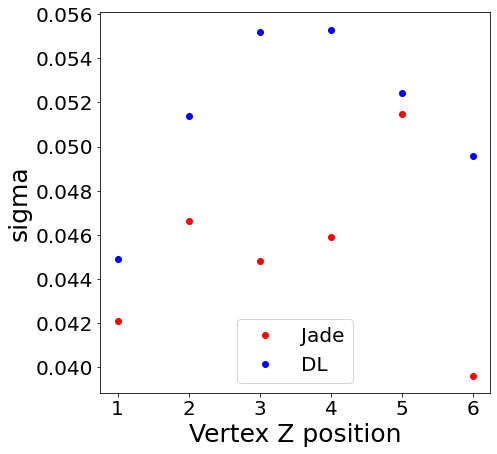

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_ja_si_z_1,Z_ja_si_z_2,Z_ja_si_z_3,Z_ja_si_z_4,Z_ja_si_z_5,Z_ja_si_z_6]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_pr_si_z_1,Z_pr_si_z_2,Z_pr_si_z_3,Z_pr_si_z_4,Z_pr_si_z_5,Z_pr_si_z_6]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_si_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_si_z,yerr=ja_si_z)
# plt.title('vertex Z si',fontsize = 25)
plt.xlabel('Vertex Z position',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
np.array([Z_ja_mu_z_1,Z_ja_mu_z_2,Z_ja_mu_z_3,Z_ja_mu_z_4,Z_ja_mu_z_5,Z_ja_mu_z_6])

array([[ 0.04317946],
       [ 0.03274274],
       [ 0.01641146],
       [ 0.00021991],
       [-0.03380614],
       [-0.05470906]])

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


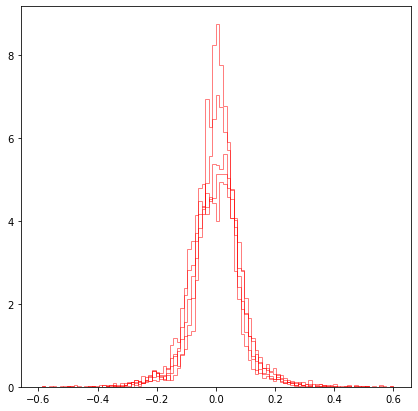

In [ ]:
ZZ = [2.5,2.0,1.5,1.0,0.5,0]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []


Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(5):    
    tmp_hist = plt.hist(jade[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])] - label[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_ja_mu_z_1.append(popt[1])
        Z_ja_si_z_1.append(popt[2])
    if k == 1:
        Z_ja_mu_z_2.append(popt[1])
        Z_ja_si_z_2.append(popt[2])
    if k == 2:
        Z_ja_mu_z_3.append(popt[1])
        Z_ja_si_z_3.append(popt[2])
    if k == 3:
        Z_ja_mu_z_4.append(popt[1])
        Z_ja_si_z_4.append(popt[2])
    if k == 4:
        Z_ja_mu_z_5.append(popt[1])
        Z_ja_si_z_5.append(popt[2])        





/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


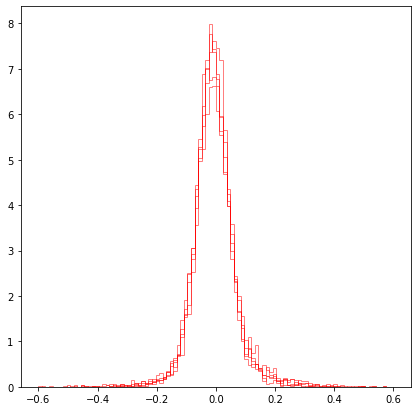

In [ ]:
ZZ = [2.5,2.0,1.5,1.0,0.5,0]


Z_pr_mu_z_1 = []
Z_pr_mu_z_2 = []
Z_pr_mu_z_3 = []
Z_pr_mu_z_4 = []
Z_pr_mu_z_5 = []
Z_pr_mu_z_6 = []

Z_pr_si_z_1 = []
Z_pr_si_z_2 = []
Z_pr_si_z_3 = []
Z_pr_si_z_4 = []
Z_pr_si_z_5 = []
Z_pr_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(5):    
    tmp_hist = plt.hist(pred[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])] - label[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)


    if k == 0:
        Z_pr_mu_z_1.append(popt[1])
        Z_pr_si_z_1.append(popt[2])
    if k == 1:
        Z_pr_mu_z_2.append(popt[1])
        Z_pr_si_z_2.append(popt[2])
    if k == 2:
        Z_pr_mu_z_3.append(popt[1])
        Z_pr_si_z_3.append(popt[2])
    if k == 3:
        Z_pr_mu_z_4.append(popt[1])
        Z_pr_si_z_4.append(popt[2])
    if k == 4:
        Z_pr_mu_z_5.append(popt[1])
        Z_pr_si_z_5.append(popt[2])        



In [ ]:
R2_label.max()

2.497957280170891

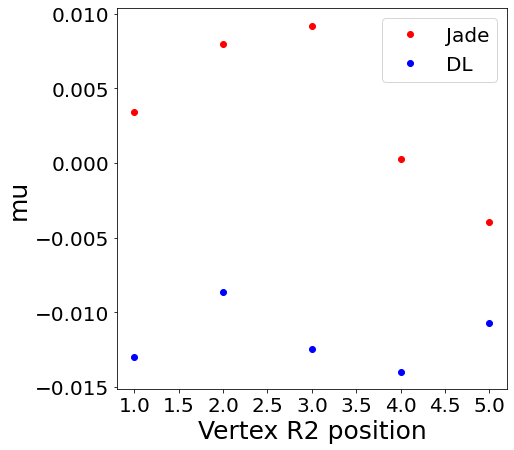

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5]),np.array([Z_ja_mu_z_1,Z_ja_mu_z_2,Z_ja_mu_z_3,Z_ja_mu_z_4,Z_ja_mu_z_5]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5]),np.array([Z_pr_mu_z_1,Z_pr_mu_z_2,Z_pr_mu_z_3,Z_pr_mu_z_4,Z_pr_mu_z_5]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Vertex R2 position',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



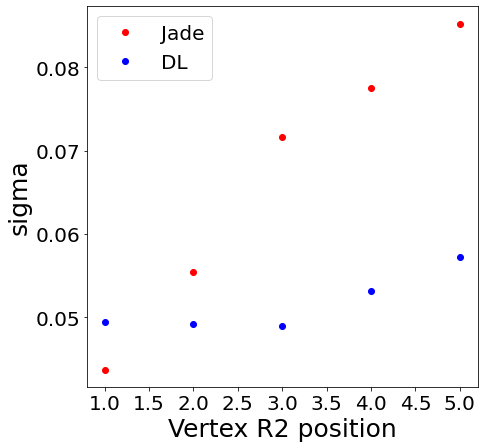

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5]),np.array([Z_ja_si_z_1,Z_ja_si_z_2,Z_ja_si_z_3,Z_ja_si_z_4,Z_ja_si_z_5]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5]),np.array([Z_pr_si_z_1,Z_pr_si_z_2,Z_pr_si_z_3,Z_pr_si_z_4,Z_pr_si_z_5]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_si_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_si_z,yerr=ja_si_z)
# plt.title('vertex Z si',fontsize = 25)
plt.xlabel('Vertex R2 position',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()

